# Medical Appointment No Shows Dataset
## The Medical Appointment No Shows dataset comprises data about medical appointments and whether patients attended their appointments. This dataset presents an excellent opportunity for students to apply their knowledge of artificial neural networks (ANNs), focusing on implementing multi-layer perceptron (MLP) models using PyTorch. Additionally, students will explore model architectures and other techniques through literature review to enhance their results.

# Dataset Description
## The dataset includes various features such as patient age, gender, appointment date and time, scheduled date and time, neighborhood, scholarship status, and whether the patient received an SMS reminder. The target variable indicates whether the patient showed up for the appointment (1 for 'showed up' and 0 for 'no-show').

# Imports

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import torch 
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import datasets
from torchvision import transforms
from copy import deepcopy
import torch.optim as optim
from tqdm.notebook import tqdm 

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [96]:
data = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
data.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [97]:
data

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0                  1         0           0        0             0      No  
1                  0         0           0        0             0      No  
2                  0         0           0        0             0      No  
3                  0         0           0        0             0      No  
4                  1         1           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110522             0         0           0        0             1      No  
110523             0         0           0        0             1      No  
110524             0         0           0        0             1      No  
110525             0         0           0        0             1      No  
110526             0         0           0        0             1      No  

[110527 rows x 14 columns]

In [98]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [99]:
data.shape

(110527, 14)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [101]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [102]:
data['PatientId'].value_counts()

PatientId
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
8.713749e+14    62
                ..
7.812456e+13     1
7.345362e+14     1
7.542951e+12     1
5.666548e+14     1
9.988472e+13     1
Name: count, Length: 62299, dtype: int64

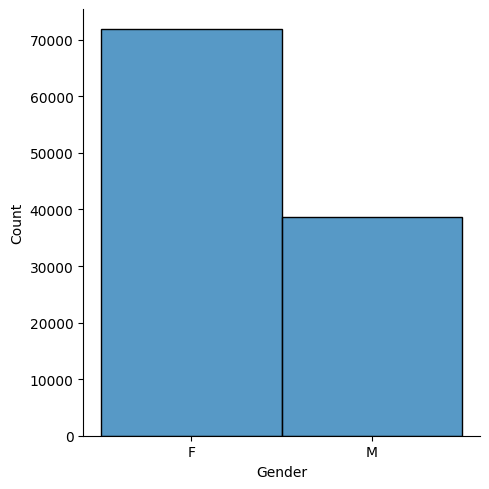

In [103]:
sns.displot(data, x="Gender")

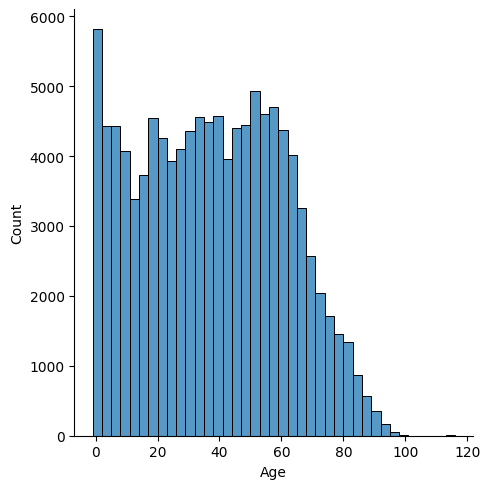

In [104]:
sns.displot(data, x="Age", binwidth=3)

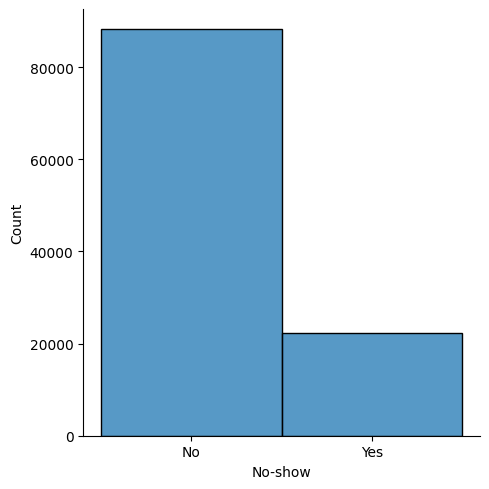

In [105]:
sns.displot(data, x="No-show")

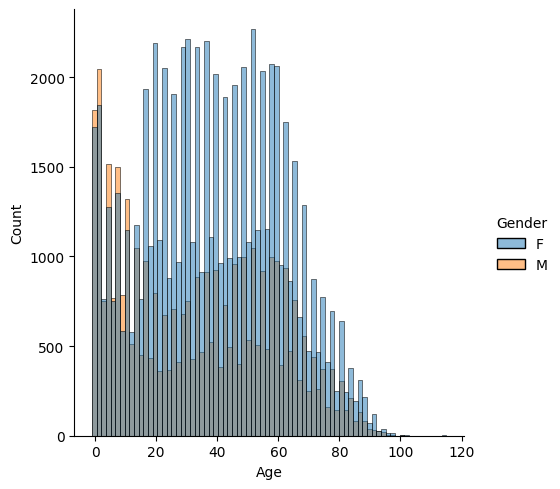

In [106]:
sns.displot(data, x="Age", hue="Gender")

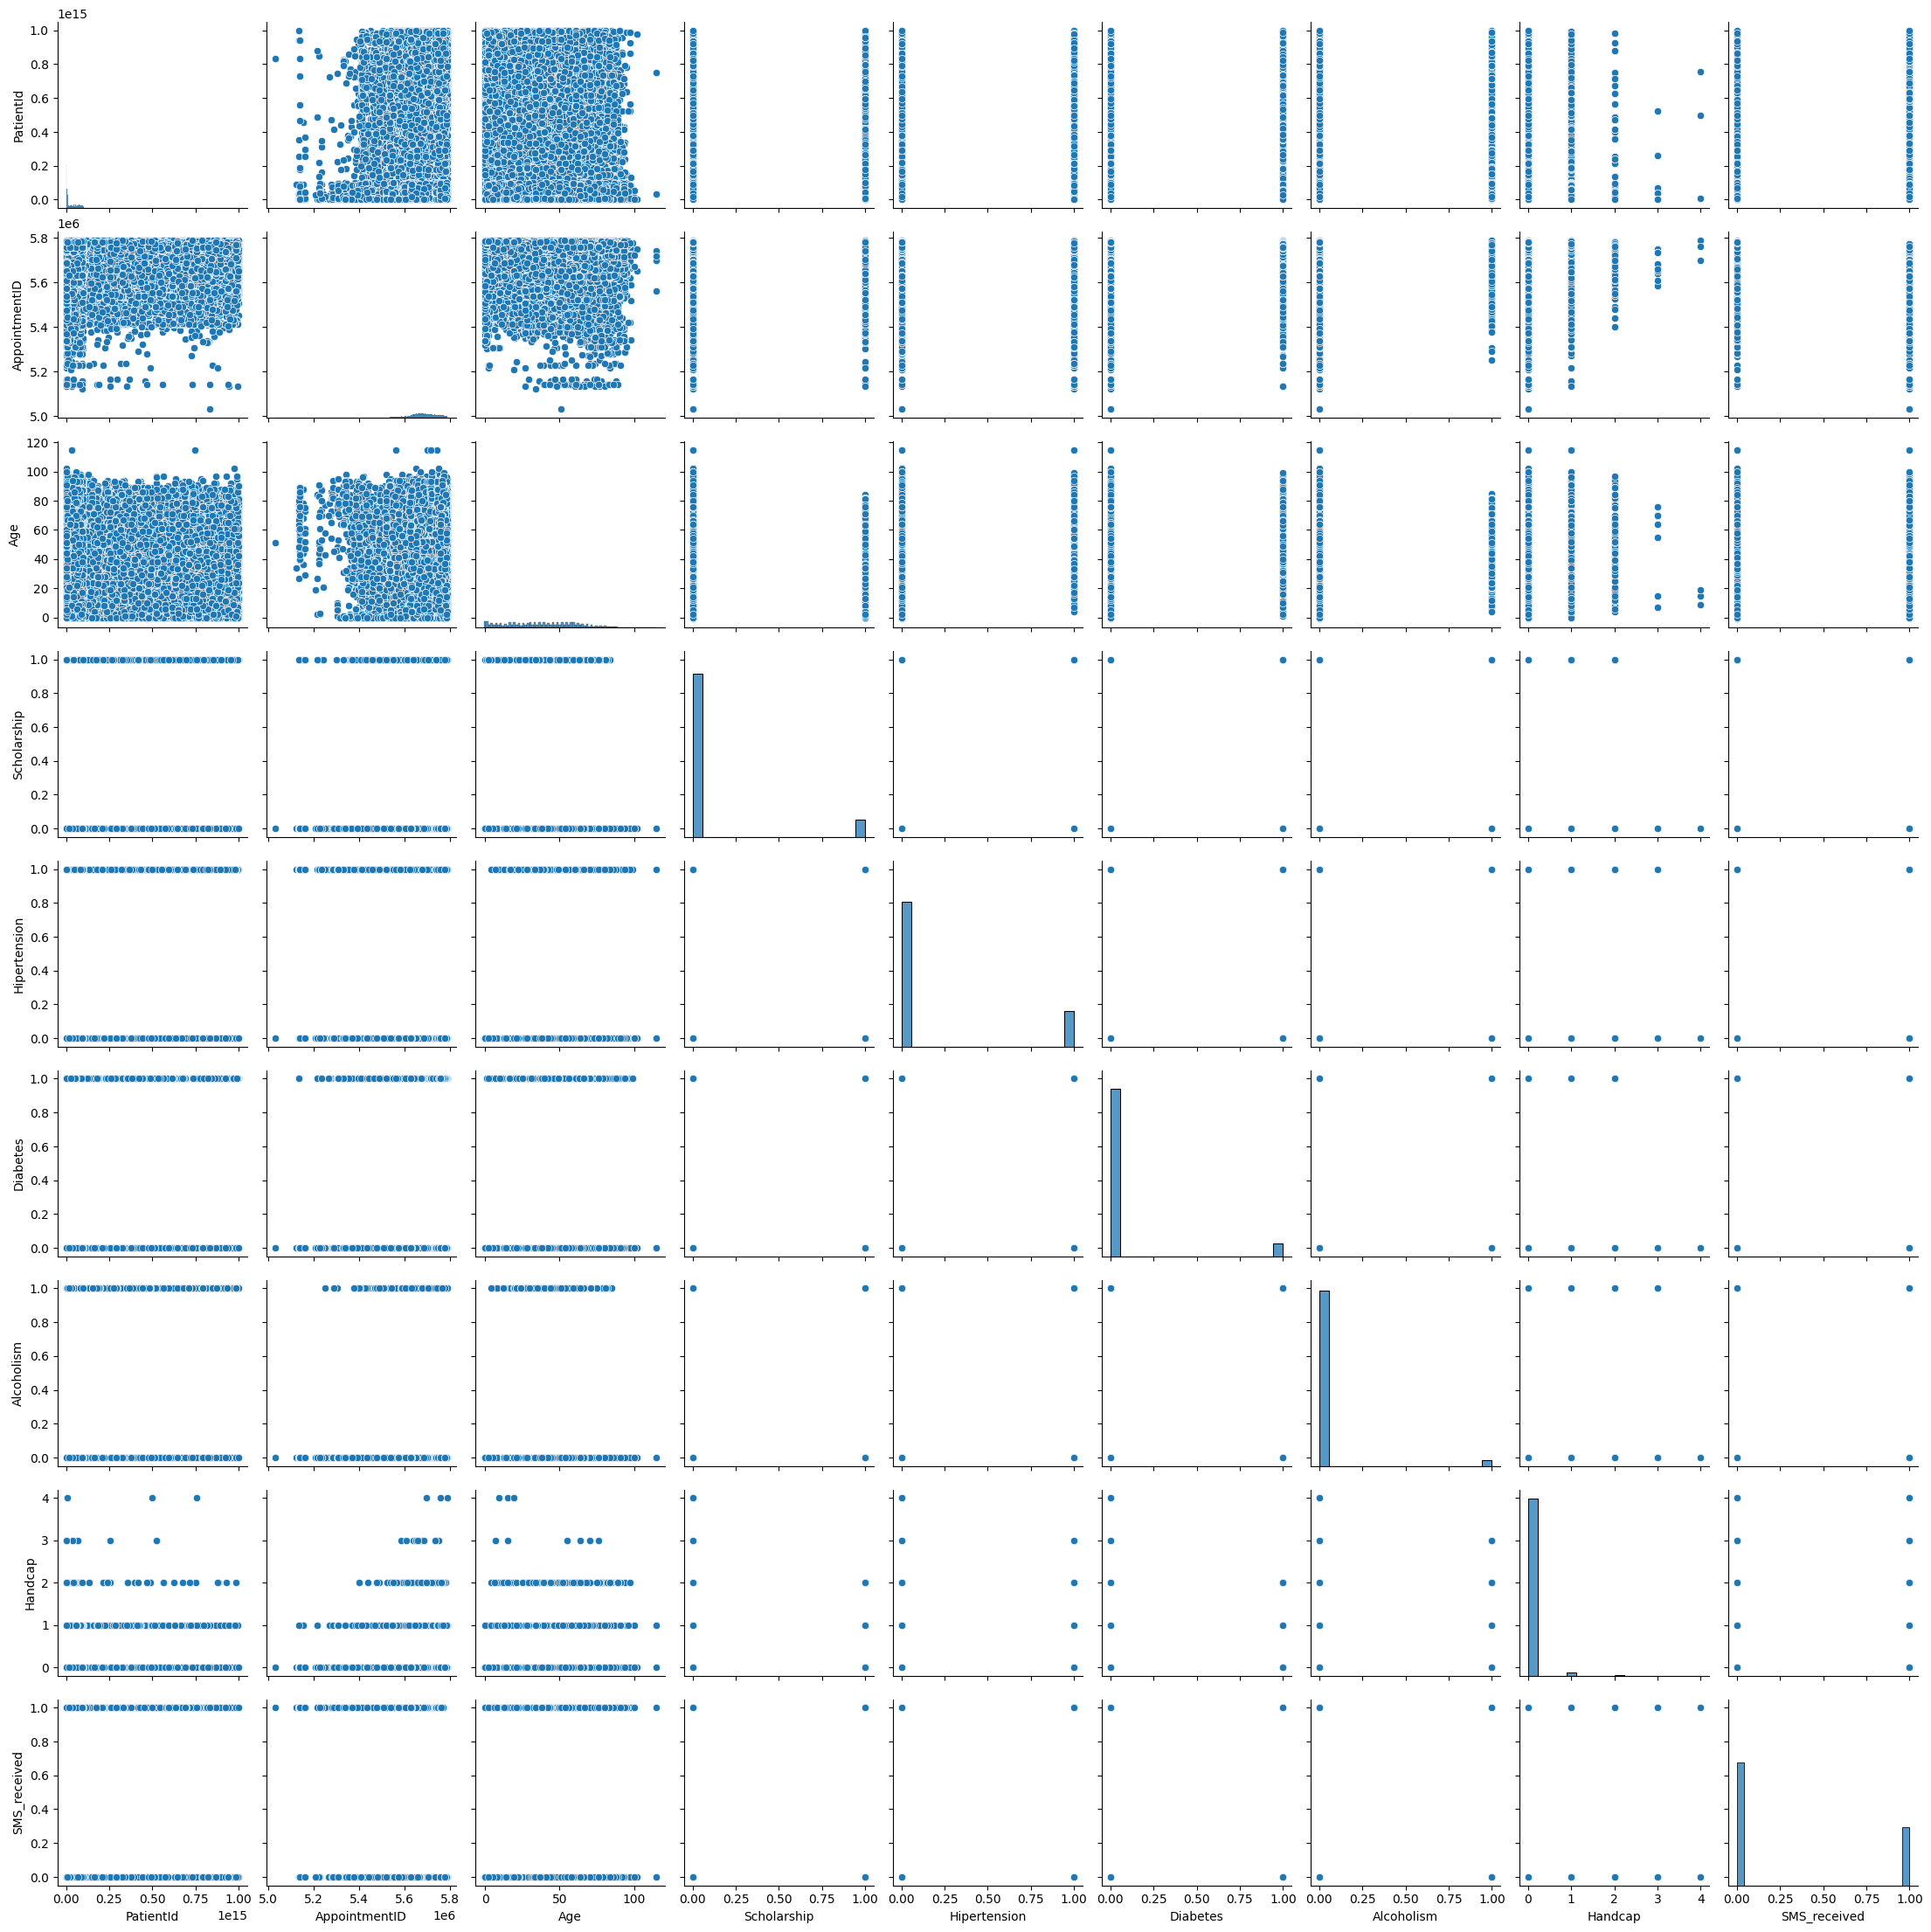

In [107]:
sns.pairplot(data)

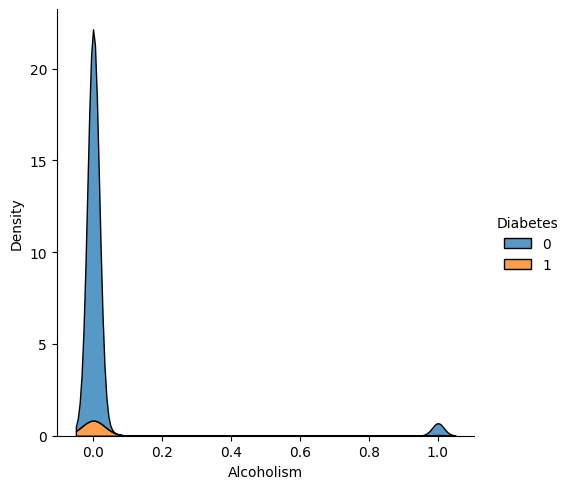

In [108]:
sns.displot(data, x="Alcoholism", hue="Diabetes", kind="kde", multiple="stack")

In [109]:
data

PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
...              ...            ...    ...                   ...   
110522  2.572134e+12        5651768      F  2016-05-03T09:15:35Z   
110523  3.596266e+12        5650093      F  2016-05-03T07:27:33Z   
110524  1.557663e+13        5630692      F  2016-04-27T16:03:52Z   
110525  9.213493e+13        5630323      F  2016-04-27T15:09:23Z   
110526  3.775115e+14        5629448      F  2016-04-27T13:30:56Z   

              AppointmentDay  Age      Neighbourhood  Scholarship  \
0       2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
1       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
2       2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
3       2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
4       2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
...                      ...  ...                ...          ...   
110522  2016-06-07T00:00:00Z   56        MARIA ORTIZ            0   
110523  2016-06-07T00:00:00Z   51        MARIA ORTIZ            0   
110524  2016-06-07T00:00:00Z   21        MARIA ORTIZ            0   
110525  2016-06-07T00:00:00Z   38        MARIA ORTIZ            0   
110526  2016-06-07T00:00:00Z   54        MARIA ORTIZ            0   

        Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0                  1         0           0        0             0      No  
1                  0         0           0        0             0      No  
2                  0         0           0        0             0      No  
3                  0         0           0        0             0      No  
4                  1         1           0        0             0      No  
...              ...       ...         ...      ...           ...     ...  
110522             0         0           0        0             1      No  
110523             0         0           0        0             1      No  
110524             0         0           0        0             1      No  
110525             0         0           0        0             1      No  
110526             0         0           0        0             1      No  

[110527 rows x 14 columns]

In [110]:
columns_to_drop = ['PatientId', 'AppointmentID']
data = data.drop(columns=columns_to_drop)

In [111]:
data

Gender          ScheduledDay        AppointmentDay  Age  \
0           F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   
1           M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56   
2           F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62   
3           F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8   
4           F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56   
...       ...                   ...                   ...  ...   
110522      F  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z   56   
110523      F  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z   51   
110524      F  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z   21   
110525      F  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z   38   
110526      F  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z   54   

            Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0         JARDIM DA PENHA            0             1         0           0   
1         JARDIM DA PENHA            0             0         0           0   
2           MATA DA PRAIA            0             0         0           0   
3       PONTAL DE CAMBURI            0             0         0           0   
4         JARDIM DA PENHA            0             1         1           0   
...                   ...          ...           ...       ...         ...   
110522        MARIA ORTIZ            0             0         0           0   
110523        MARIA ORTIZ            0             0         0           0   
110524        MARIA ORTIZ            0             0         0           0   
110525        MARIA ORTIZ            0             0         0           0   
110526        MARIA ORTIZ            0             0         0           0   

        Handcap  SMS_received No-show  
0             0             0      No  
1             0             0      No  
2             0             0      No  
3             0             0      No  
4             0             0      No  
...         ...           ...     ...  
110522        0             1      No  
110523        0             1      No  
110524        0             1      No  
110525        0             1      No  
110526        0             1      No  

[110527 rows x 12 columns]

In [112]:
data.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [113]:
data.isnull().sum().sum()

0

In [114]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [115]:
data

Gender          ScheduledDay        AppointmentDay  Age  \
0           F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   
1           M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56   
2           F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62   
3           F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8   
4           F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56   
...       ...                   ...                   ...  ...   
110522      F  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z   56   
110523      F  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z   51   
110524      F  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z   21   
110525      F  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z   38   
110526      F  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z   54   

            Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0         JARDIM DA PENHA            0             1         0           0   
1         JARDIM DA PENHA            0             0         0           0   
2           MATA DA PRAIA            0             0         0           0   
3       PONTAL DE CAMBURI            0             0         0           0   
4         JARDIM DA PENHA            0             1         1           0   
...                   ...          ...           ...       ...         ...   
110522        MARIA ORTIZ            0             0         0           0   
110523        MARIA ORTIZ            0             0         0           0   
110524        MARIA ORTIZ            0             0         0           0   
110525        MARIA ORTIZ            0             0         0           0   
110526        MARIA ORTIZ            0             0         0           0   

        Handcap  SMS_received No-show  
0             0             0      No  
1             0             0      No  
2             0             0      No  
3             0             0      No  
4             0             0      No  
...         ...           ...     ...  
110522        0             1      No  
110523        0             1      No  
110524        0             1      No  
110525        0             1      No  
110526        0             1      No  

[110527 rows x 12 columns]

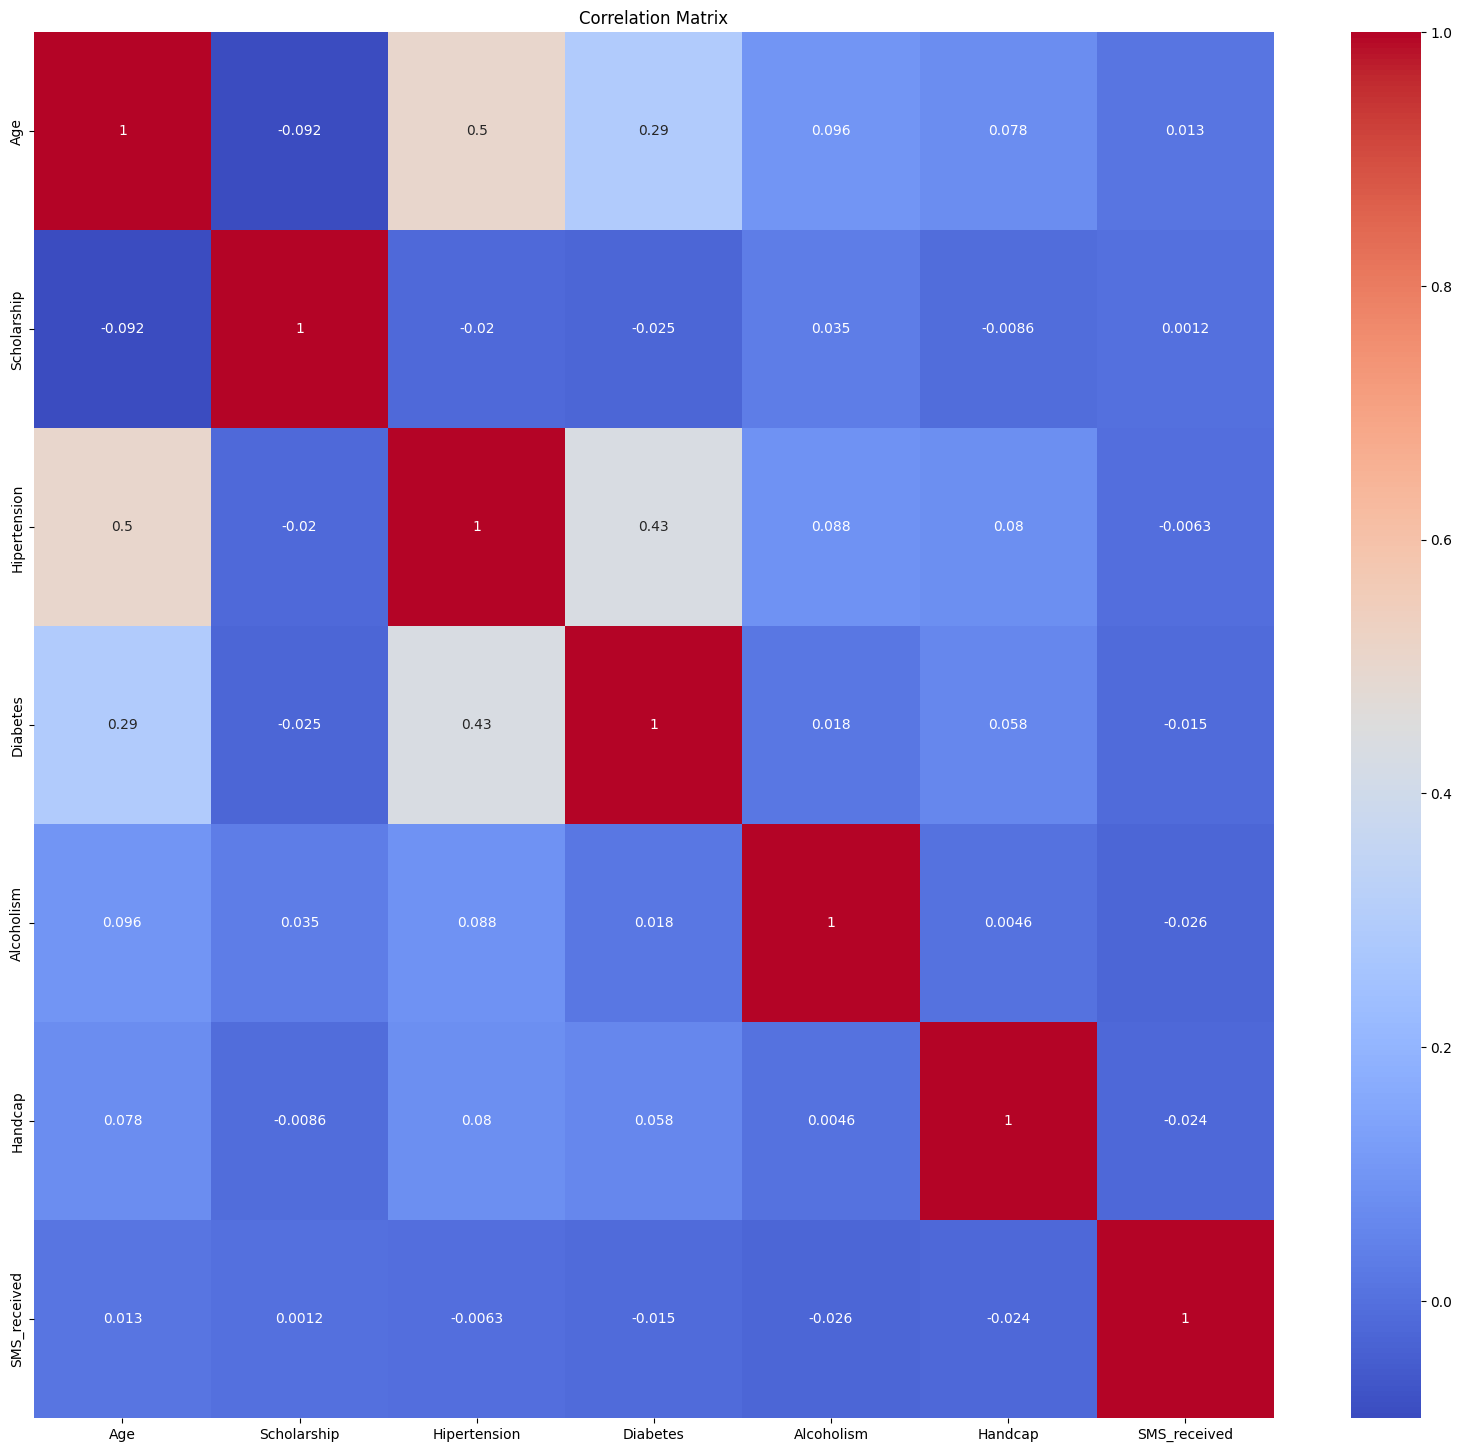

In [116]:
plt.figure(figsize=(20, 18))
sns.heatmap(data.select_dtypes(exclude=['object', 'category']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [117]:
correlation_matrix = data.select_dtypes(exclude=['object', 'category']).corr()
print(correlation_matrix)

                   Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
Age           1.000000    -0.092457      0.504586  0.292391    0.095811   
Scholarship  -0.092457     1.000000     -0.019729 -0.024894    0.035022   
Hipertension  0.504586    -0.019729      1.000000  0.433086    0.087971   
Diabetes      0.292391    -0.024894      0.433086  1.000000    0.018474   
Alcoholism    0.095811     0.035022      0.087971  0.018474    1.000000   
Handcap       0.078033    -0.008586      0.080083  0.057530    0.004648   
SMS_received  0.012643     0.001194     -0.006267 -0.014550   -0.026147   

               Handcap  SMS_received  
Age           0.078033      0.012643  
Scholarship  -0.008586      0.001194  
Hipertension  0.080083     -0.006267  
Diabetes      0.057530     -0.014550  
Alcoholism    0.004648     -0.026147  
Handcap       1.000000     -0.024161  
SMS_received -0.024161      1.000000  


In [118]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])
data['Sday'] = pd.DatetimeIndex(data['ScheduledDay']).day
data['Smonth'] = pd.DatetimeIndex(data['ScheduledDay']).month
data['Syear'] = pd.DatetimeIndex(data['ScheduledDay']).year

In [119]:
data['Aday'] = pd.DatetimeIndex(data['AppointmentDay']).day
data['Amonth'] = pd.DatetimeIndex(data['AppointmentDay']).month
data['Ayear'] = pd.DatetimeIndex(data['AppointmentDay']).year

In [120]:
data['PartOfDay'] = data['ScheduledDay'].dt.strftime('%H:%M:%S').astype('datetime64[ns]').dt.hour.apply(lambda x: 'Morning' if 6 <= x < 12 else 'Afternoon' if 12 <= x < 18 else 'Evening')

In [121]:
data

Gender              ScheduledDay            AppointmentDay  Age  \
0           F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1           M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2           F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3           F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4           F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   
...       ...                       ...                       ...  ...   
110522      F 2016-05-03 09:15:35+00:00 2016-06-07 00:00:00+00:00   56   
110523      F 2016-05-03 07:27:33+00:00 2016-06-07 00:00:00+00:00   51   
110524      F 2016-04-27 16:03:52+00:00 2016-06-07 00:00:00+00:00   21   
110525      F 2016-04-27 15:09:23+00:00 2016-06-07 00:00:00+00:00   38   
110526      F 2016-04-27 13:30:56+00:00 2016-06-07 00:00:00+00:00   54   

            Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0         JARDIM DA PENHA            0             1         0           0   
1         JARDIM DA PENHA            0             0         0           0   
2           MATA DA PRAIA            0             0         0           0   
3       PONTAL DE CAMBURI            0             0         0           0   
4         JARDIM DA PENHA            0             1         1           0   
...                   ...          ...           ...       ...         ...   
110522        MARIA ORTIZ            0             0         0           0   
110523        MARIA ORTIZ            0             0         0           0   
110524        MARIA ORTIZ            0             0         0           0   
110525        MARIA ORTIZ            0             0         0           0   
110526        MARIA ORTIZ            0             0         0           0   

        Handcap  SMS_received No-show  Sday  Smonth  Syear  Aday  Amonth  \
0             0             0      No    29       4   2016    29       4   
1             0             0      No    29       4   2016    29       4   
2             0             0      No    29       4   2016    29       4   
3             0             0      No    29       4   2016    29       4   
4             0             0      No    29       4   2016    29       4   
...         ...           ...     ...   ...     ...    ...   ...     ...   
110522        0             1      No     3       5   2016     7       6   
110523        0             1      No     3       5   2016     7       6   
110524        0             1      No    27       4   2016     7       6   
110525        0             1      No    27       4   2016     7       6   
110526        0             1      No    27       4   2016     7       6   

        Ayear  PartOfDay  
0        2016    Evening  
1        2016  Afternoon  
2        2016  Afternoon  
3        2016  Afternoon  
4        2016  Afternoon  
...       ...        ...  
110522   2016    Morning  
110523   2016    Morning  
110524   2016  Afternoon  
110525   2016  Afternoon  
110526   2016  Afternoon  

[110527 rows x 19 columns]

In [122]:
columns_to_drop_2 = ['ScheduledDay', 'AppointmentDay']
data = data.drop(columns=columns_to_drop_2)

In [123]:
data

Gender  Age      Neighbourhood  Scholarship  Hipertension  Diabetes  \
0           F   62    JARDIM DA PENHA            0             1         0   
1           M   56    JARDIM DA PENHA            0             0         0   
2           F   62      MATA DA PRAIA            0             0         0   
3           F    8  PONTAL DE CAMBURI            0             0         0   
4           F   56    JARDIM DA PENHA            0             1         1   
...       ...  ...                ...          ...           ...       ...   
110522      F   56        MARIA ORTIZ            0             0         0   
110523      F   51        MARIA ORTIZ            0             0         0   
110524      F   21        MARIA ORTIZ            0             0         0   
110525      F   38        MARIA ORTIZ            0             0         0   
110526      F   54        MARIA ORTIZ            0             0         0   

        Alcoholism  Handcap  SMS_received No-show  Sday  Smonth  Syear  Aday  \
0                0        0             0      No    29       4   2016    29   
1                0        0             0      No    29       4   2016    29   
2                0        0             0      No    29       4   2016    29   
3                0        0             0      No    29       4   2016    29   
4                0        0             0      No    29       4   2016    29   
...            ...      ...           ...     ...   ...     ...    ...   ...   
110522           0        0             1      No     3       5   2016     7   
110523           0        0             1      No     3       5   2016     7   
110524           0        0             1      No    27       4   2016     7   
110525           0        0             1      No    27       4   2016     7   
110526           0        0             1      No    27       4   2016     7   

        Amonth  Ayear  PartOfDay  
0            4   2016    Evening  
1            4   2016  Afternoon  
2            4   2016  Afternoon  
3            4   2016  Afternoon  
4            4   2016  Afternoon  
...        ...    ...        ...  
110522       6   2016    Morning  
110523       6   2016    Morning  
110524       6   2016  Afternoon  
110525       6   2016  Afternoon  
110526       6   2016  Afternoon  

[110527 rows x 17 columns]

In [124]:
object_columns = data.select_dtypes(include=['object'])
for col in object_columns:
    print(col)

Gender
Neighbourhood
No-show
PartOfDay


In [125]:
categorical_columns = ['Gender', 'Neighbourhood', 'No-show', 'PartOfDay']
encoded_data = pd.get_dummies(data, columns=categorical_columns, dtype=int,drop_first=True)

In [126]:
encoded_data

Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0        62            0             1         0           0        0   
1        56            0             0         0           0        0   
2        62            0             0         0           0        0   
3         8            0             0         0           0        0   
4        56            0             1         1           0        0   
...     ...          ...           ...       ...         ...      ...   
110522   56            0             0         0           0        0   
110523   51            0             0         0           0        0   
110524   21            0             0         0           0        0   
110525   38            0             0         0           0        0   
110526   54            0             0         0           0        0   

        SMS_received  Sday  Smonth  Syear  ...  Neighbourhood_SÃO BENEDITO  \
0                  0    29       4   2016  ...                           0   
1                  0    29       4   2016  ...                           0   
2                  0    29       4   2016  ...                           0   
3                  0    29       4   2016  ...                           0   
4                  0    29       4   2016  ...                           0   
...              ...   ...     ...    ...  ...                         ...   
110522             1     3       5   2016  ...                           0   
110523             1     3       5   2016  ...                           0   
110524             1    27       4   2016  ...                           0   
110525             1    27       4   2016  ...                           0   
110526             1    27       4   2016  ...                           0   

        Neighbourhood_SÃO CRISTÓVÃO  Neighbourhood_SÃO JOSÉ  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
110522                            0                       0   
110523                            0                       0   
110524                            0                       0   
110525                            0                       0   
110526                            0                       0   

        Neighbourhood_SÃO PEDRO  Neighbourhood_TABUAZEIRO  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
110522                        0                         0   
110523                        0                         0   
110524                        0                         0   
110525                        0                         0   
110526                        0                         0   

        Neighbourhood_UNIVERSITÁRIO  Neighbourhood_VILA RUBIM  No-show_Yes  \
0                                 0                         0            0   
1                                 0                         0            0   
2                                 0                         0            0   
3                                 0                         0            0   
4                                 0                         0            0   
...                             ...                       ...          ...   
110522                            0                         0            0   
110523                            0                         0            0   
11

In [127]:
data = encoded_data

In [128]:
data

Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0        62            0             1         0           0        0   
1        56            0             0         0           0        0   
2        62            0             0         0           0        0   
3         8            0             0         0           0        0   
4        56            0             1         1           0        0   
...     ...          ...           ...       ...         ...      ...   
110522   56            0             0         0           0        0   
110523   51            0             0         0           0        0   
110524   21            0             0         0           0        0   
110525   38            0             0         0           0        0   
110526   54            0             0         0           0        0   

        SMS_received  Sday  Smonth  Syear  ...  Neighbourhood_SÃO BENEDITO  \
0                  0    29       4   2016  ...                           0   
1                  0    29       4   2016  ...                           0   
2                  0    29       4   2016  ...                           0   
3                  0    29       4   2016  ...                           0   
4                  0    29       4   2016  ...                           0   
...              ...   ...     ...    ...  ...                         ...   
110522             1     3       5   2016  ...                           0   
110523             1     3       5   2016  ...                           0   
110524             1    27       4   2016  ...                           0   
110525             1    27       4   2016  ...                           0   
110526             1    27       4   2016  ...                           0   

        Neighbourhood_SÃO CRISTÓVÃO  Neighbourhood_SÃO JOSÉ  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
110522                            0                       0   
110523                            0                       0   
110524                            0                       0   
110525                            0                       0   
110526                            0                       0   

        Neighbourhood_SÃO PEDRO  Neighbourhood_TABUAZEIRO  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
110522                        0                         0   
110523                        0                         0   
110524                        0                         0   
110525                        0                         0   
110526                        0                         0   

        Neighbourhood_UNIVERSITÁRIO  Neighbourhood_VILA RUBIM  No-show_Yes  \
0                                 0                         0            0   
1                                 0                         0            0   
2                                 0                         0            0   
3                                 0                         0            0   
4                                 0                         0            0   
...                             ...                       ...          ...   
110522                            0                         0            0   
110523                            0                         0            0   
11

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['No-show_Yes'], axis=1), data['No-show_Yes'], test_size=0.2, random_state=42)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [131]:
data

Age  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  \
0        62            0             1         0           0        0   
1        56            0             0         0           0        0   
2        62            0             0         0           0        0   
3         8            0             0         0           0        0   
4        56            0             1         1           0        0   
...     ...          ...           ...       ...         ...      ...   
110522   56            0             0         0           0        0   
110523   51            0             0         0           0        0   
110524   21            0             0         0           0        0   
110525   38            0             0         0           0        0   
110526   54            0             0         0           0        0   

        SMS_received  Sday  Smonth  Syear  ...  Neighbourhood_SÃO BENEDITO  \
0                  0    29       4   2016  ...                           0   
1                  0    29       4   2016  ...                           0   
2                  0    29       4   2016  ...                           0   
3                  0    29       4   2016  ...                           0   
4                  0    29       4   2016  ...                           0   
...              ...   ...     ...    ...  ...                         ...   
110522             1     3       5   2016  ...                           0   
110523             1     3       5   2016  ...                           0   
110524             1    27       4   2016  ...                           0   
110525             1    27       4   2016  ...                           0   
110526             1    27       4   2016  ...                           0   

        Neighbourhood_SÃO CRISTÓVÃO  Neighbourhood_SÃO JOSÉ  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
110522                            0                       0   
110523                            0                       0   
110524                            0                       0   
110525                            0                       0   
110526                            0                       0   

        Neighbourhood_SÃO PEDRO  Neighbourhood_TABUAZEIRO  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
110522                        0                         0   
110523                        0                         0   
110524                        0                         0   
110525                        0                         0   
110526                        0                         0   

        Neighbourhood_UNIVERSITÁRIO  Neighbourhood_VILA RUBIM  No-show_Yes  \
0                                 0                         0            0   
1                                 0                         0            0   
2                                 0                         0            0   
3                                 0                         0            0   
4                                 0                         0            0   
...                             ...                       ...          ...   
110522                            0                         0            0   
110523                            0                         0            0   
11

In [132]:
data.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'Sday', 'Smonth', 'Syear', 'Aday', 'Amonth',
       'Ayear', 'Gender_M', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO', 'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neighbourhood_GRA

In [133]:
data.dtypes

Age                            int64
Scholarship                    int64
Hipertension                   int64
Diabetes                       int64
Alcoholism                     int64
                               ...  
Neighbourhood_UNIVERSITÁRIO    int64
Neighbourhood_VILA RUBIM       int64
No-show_Yes                    int64
PartOfDay_Evening              int64
PartOfDay_Morning              int64
Length: 97, dtype: object

In [134]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [135]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_transformed, y_train)

In [136]:
y_test.shape

(22106,)

In [137]:
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(device)

In [138]:
from torch.utils.data import DataLoader, TensorDataset

In [139]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
train_dataloader = DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size=16, shuffle=True)
test_dataloader = DataLoader(TensorDataset(X_test_tensor,y_test_tensor), batch_size=16, shuffle=False)

In [140]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.activation = activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

In [141]:
def training(model, loss_module, optimizer, train_dl,test_loader, num_epochs, device, scheduler=None):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    outputs = None
    pbar = tqdm(range(num_epochs))
    for _ in pbar:
        model.train()
        avgLoss = 0
        for x, y in train_dl:
            x = x.to(device) 
            y = y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = loss_module(outputs, y.view(-1, 1))
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            model.eval()
            train_outputs = model(X_train_tensor)
            train_loss = loss_module(train_outputs, y_train_tensor.view(-1, 1))
            train_losses.append(train_loss.item())
            train_predicted = (train_outputs >= 0.5).float()
            train_accuracie = (train_predicted == y_train_tensor.view(-1, 1)).float().mean()
            train_accuracies.append(train_accuracie.item())
            test_outputs = model(X_test_tensor)
            test_loss = loss_module(test_outputs, y_test_tensor.view(-1, 1))
            test_losses.append(test_loss.item())
            test_predicted = (test_outputs >= 0.5).float()
            test_accuracie = (test_predicted == y_test_tensor.view(-1, 1)).float().mean()
            test_accuracies.append(test_accuracie.item())
        pbar.set_description(f"Loss is : [{train_loss}]")
    return model, train_losses, train_accuracies, test_losses, test_accuracies

In [142]:
from sklearn.metrics import classification_report

In [143]:
def plot(train_losses, test_losses, train_accuracy, test_accuracy, model):
    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="test loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.plot(train_accuracy, label="Training accuracy")
    plt.plot(test_accuracy, label="test accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_predicted = (test_outputs >= 0.5).float()
        test_accuracy = (test_predicted == y_test_tensor.view(-1, 1)).float().mean()
        tqdm.write(f'Test Accuracy: {test_accuracy.item():.4f}')
        cm = confusion_matrix(y_test, test_predicted.cpu())
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        tqdm.write("Classification Report:")
        tqdm.write(classification_report(y_test, test_predicted.cpu()))

In [144]:
from sklearn.metrics import confusion_matrix

  0%|          | 0/10 [00:00<?, ?it/s]

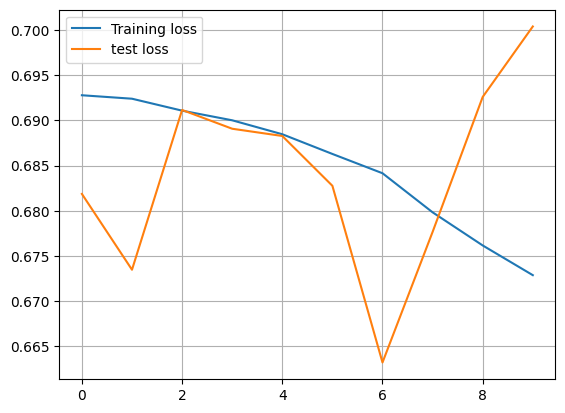

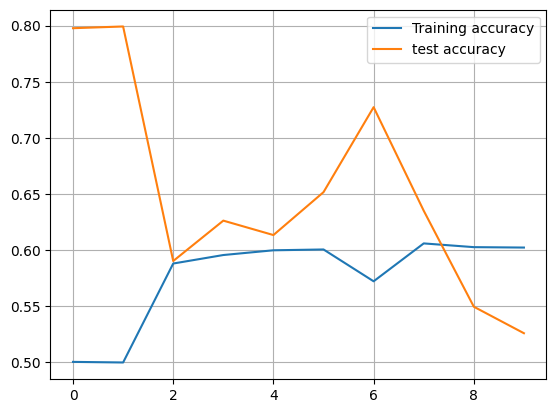

Test Accuracy: 0.5261


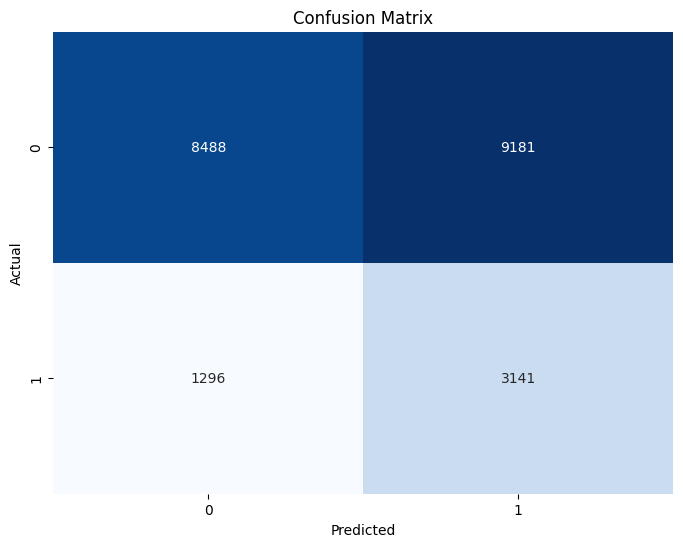

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.48      0.62     17669
           1       0.25      0.71      0.37      4437

    accuracy                           0.53     22106
   macro avg       0.56      0.59      0.50     22106
weighted avg       0.74      0.53      0.57     22106



In [145]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

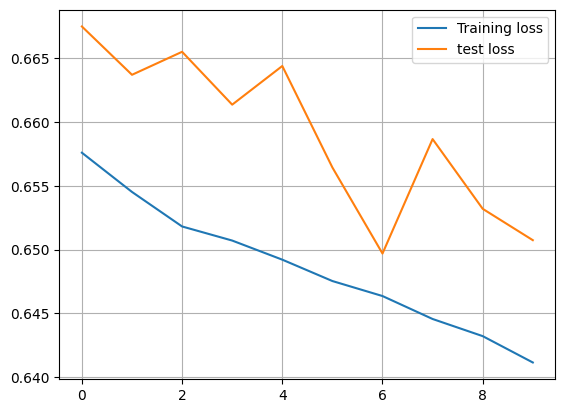

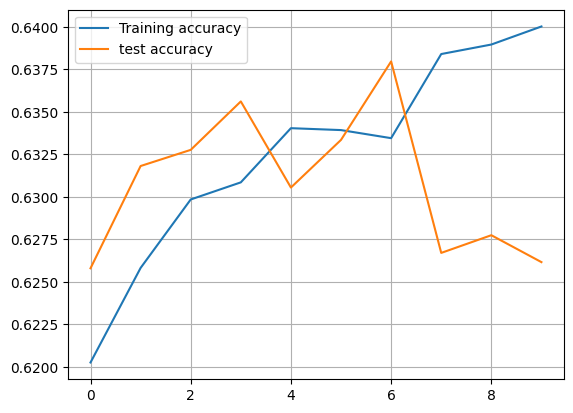

Test Accuracy: 0.6262


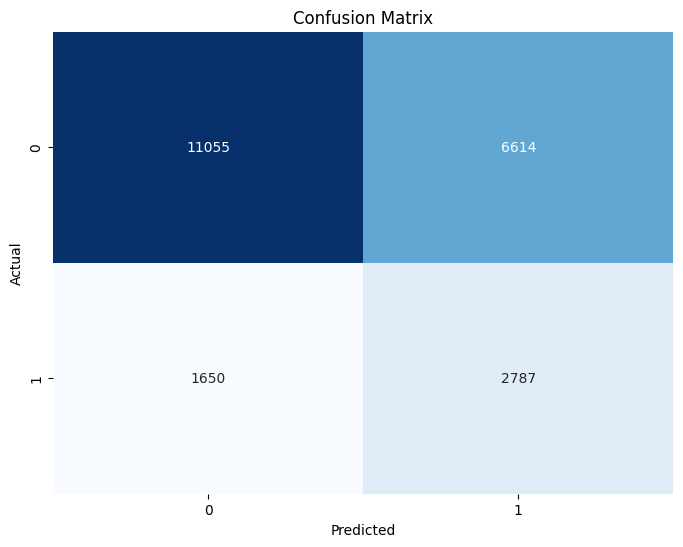

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.63      0.73     17669
           1       0.30      0.63      0.40      4437

    accuracy                           0.63     22106
   macro avg       0.58      0.63      0.57     22106
weighted avg       0.75      0.63      0.66     22106



In [146]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Tanh()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

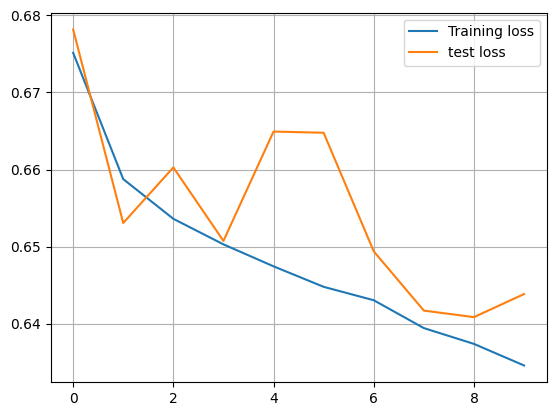

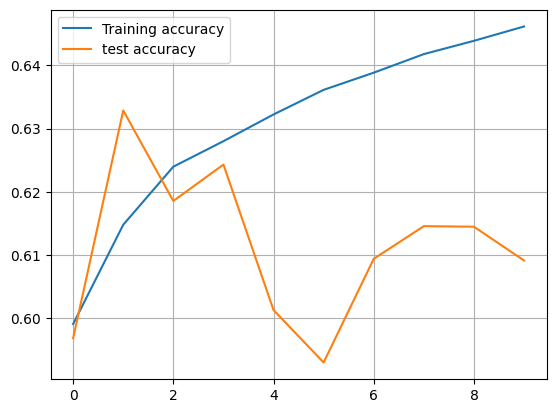

Test Accuracy: 0.6092


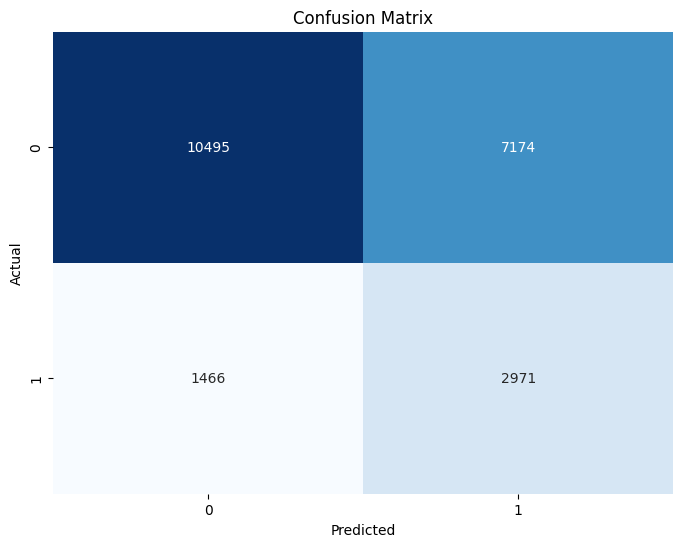

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71     17669
           1       0.29      0.67      0.41      4437

    accuracy                           0.61     22106
   macro avg       0.59      0.63      0.56     22106
weighted avg       0.76      0.61      0.65     22106



In [147]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.ReLU()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

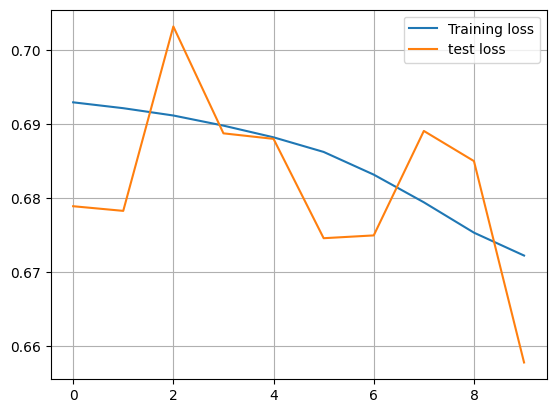

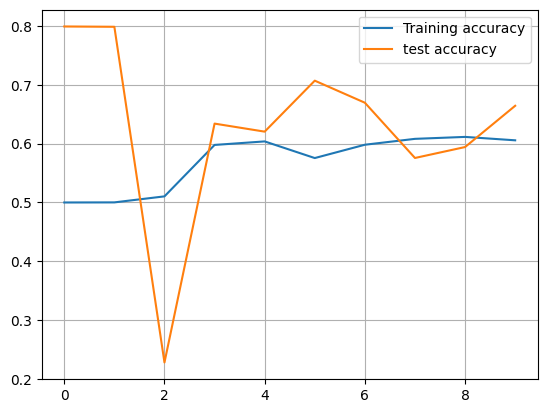

Test Accuracy: 0.6644


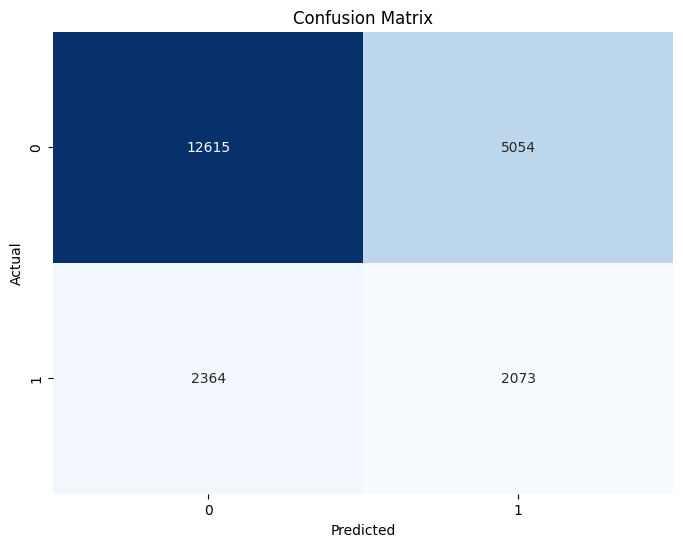

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77     17669
           1       0.29      0.47      0.36      4437

    accuracy                           0.66     22106
   macro avg       0.57      0.59      0.57     22106
weighted avg       0.73      0.66      0.69     22106



In [148]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

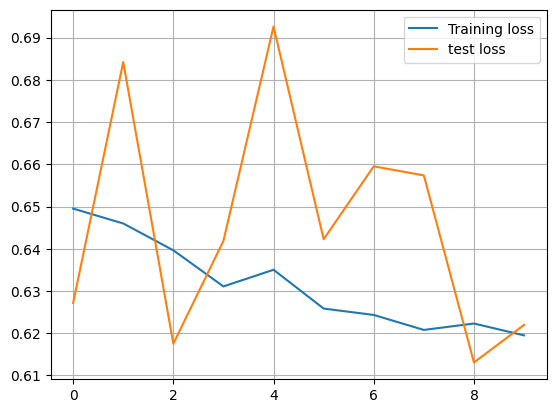

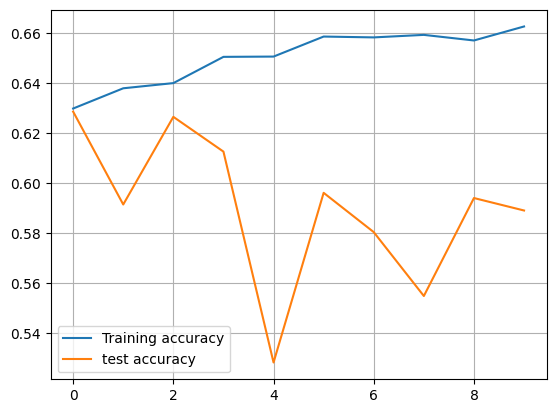

Test Accuracy: 0.5891


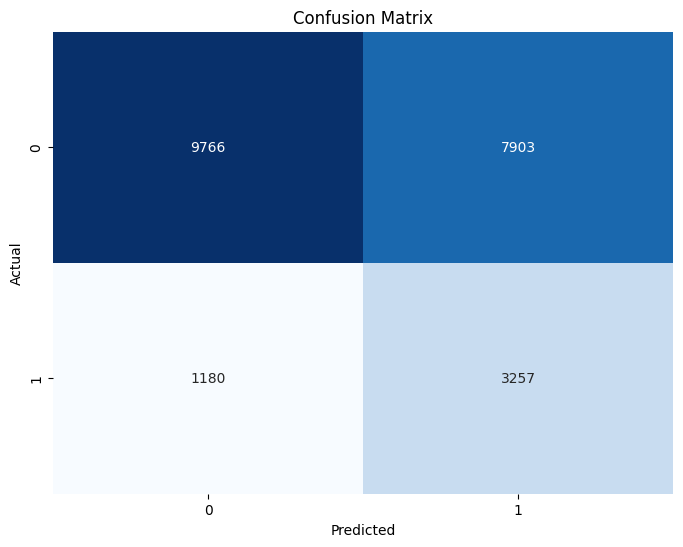

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.55      0.68     17669
           1       0.29      0.73      0.42      4437

    accuracy                           0.59     22106
   macro avg       0.59      0.64      0.55     22106
weighted avg       0.77      0.59      0.63     22106



In [149]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

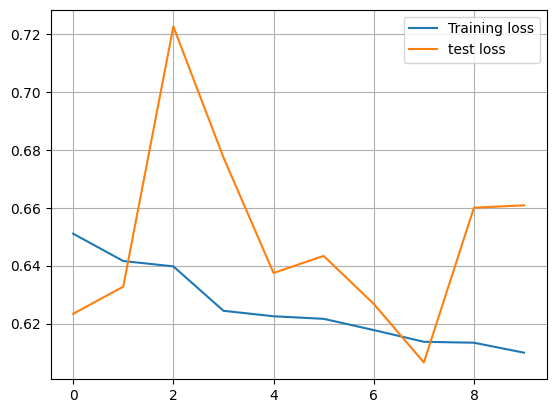

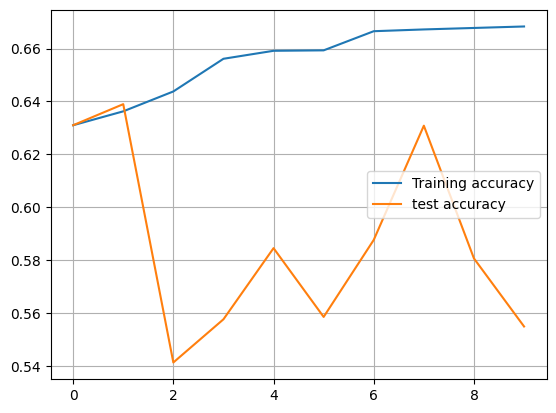

Test Accuracy: 0.5549


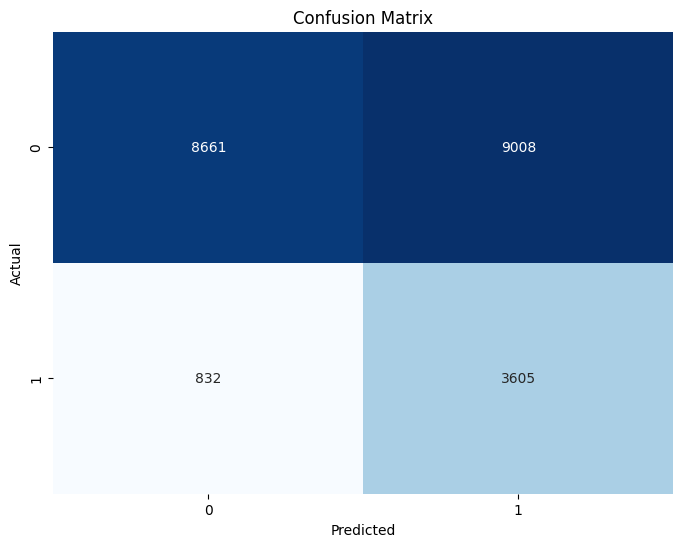

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.49      0.64     17669
           1       0.29      0.81      0.42      4437

    accuracy                           0.55     22106
   macro avg       0.60      0.65      0.53     22106
weighted avg       0.79      0.55      0.59     22106



In [150]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

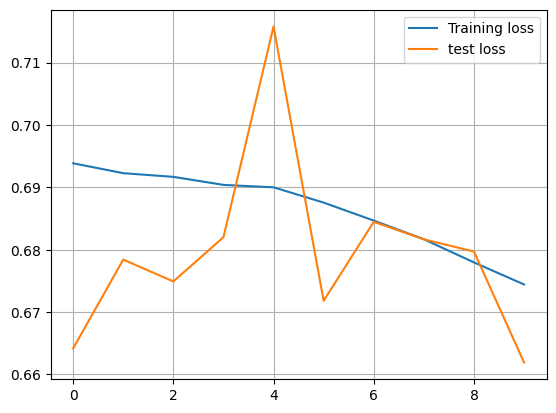

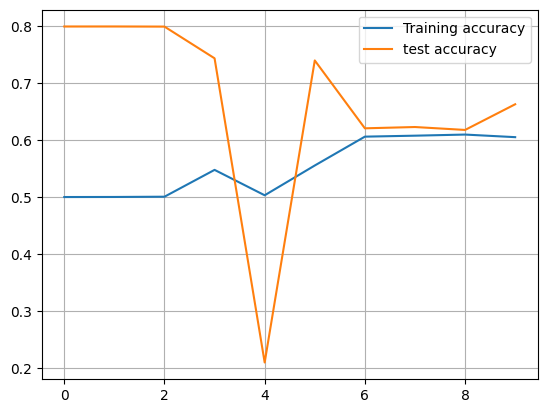

Test Accuracy: 0.6628


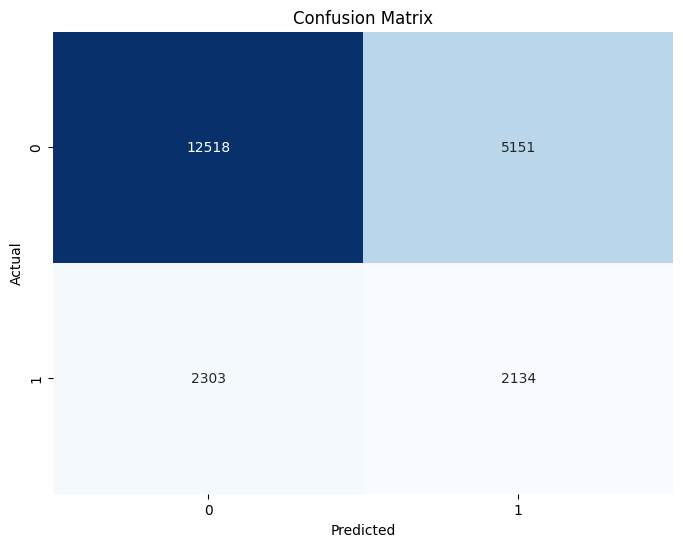

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77     17669
           1       0.29      0.48      0.36      4437

    accuracy                           0.66     22106
   macro avg       0.57      0.59      0.57     22106
weighted avg       0.73      0.66      0.69     22106



In [151]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

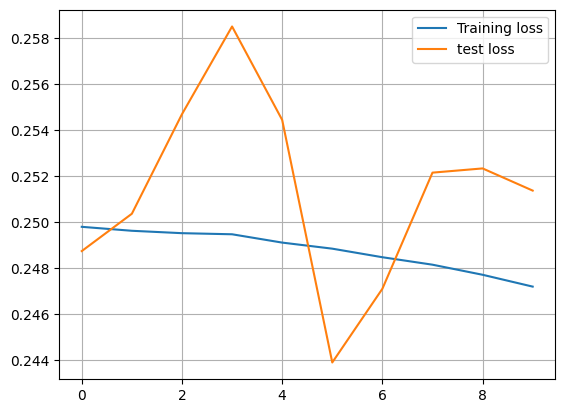

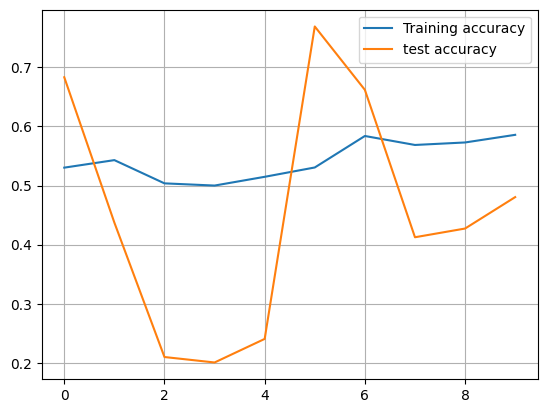

Test Accuracy: 0.4805


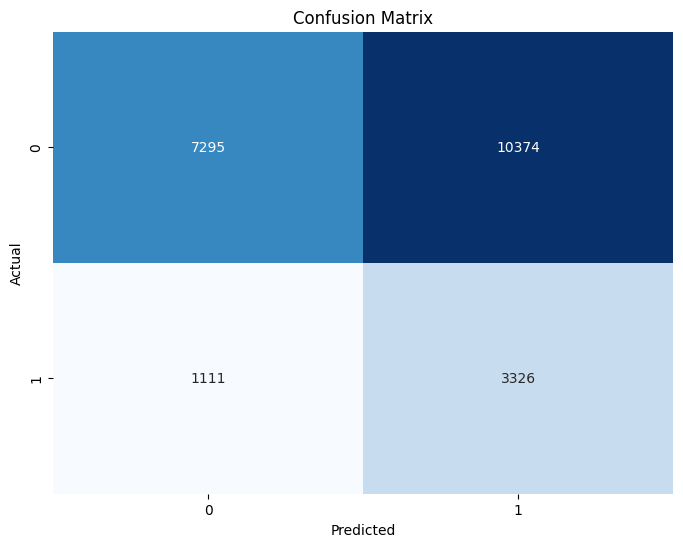

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.41      0.56     17669
           1       0.24      0.75      0.37      4437

    accuracy                           0.48     22106
   macro avg       0.56      0.58      0.46     22106
weighted avg       0.74      0.48      0.52     22106



In [152]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

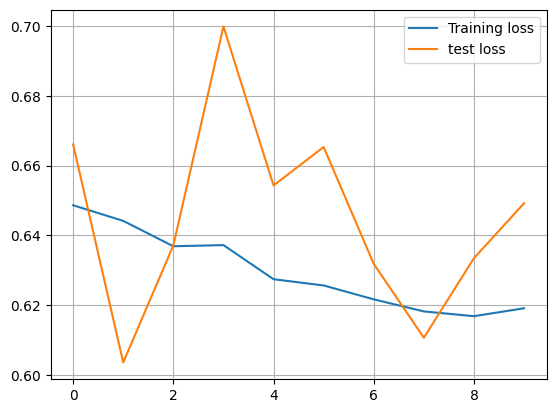

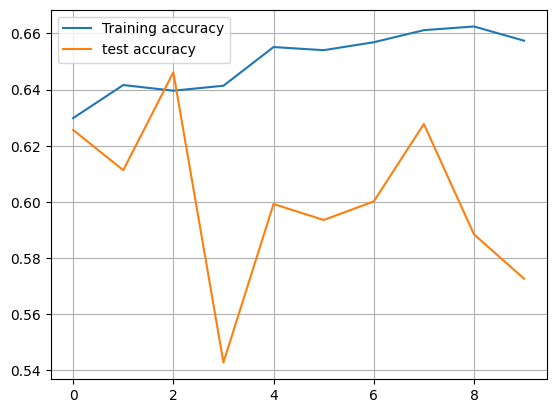

Test Accuracy: 0.5726


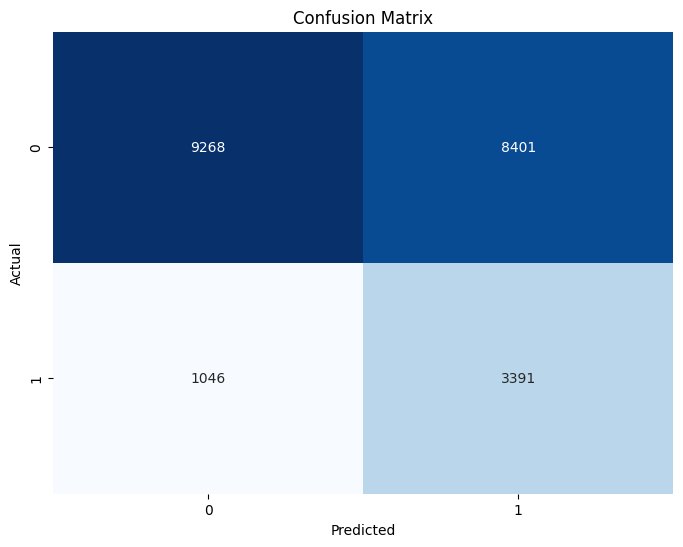

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66     17669
           1       0.29      0.76      0.42      4437

    accuracy                           0.57     22106
   macro avg       0.59      0.64      0.54     22106
weighted avg       0.78      0.57      0.61     22106



In [153]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

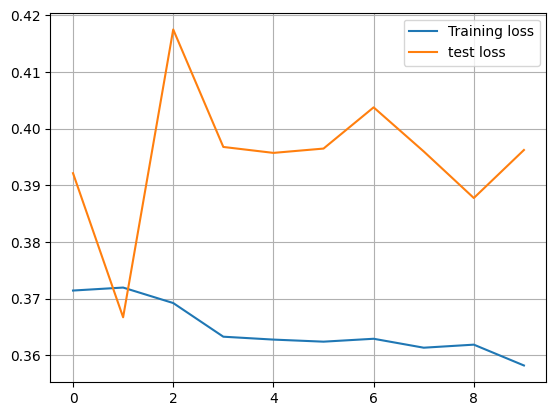

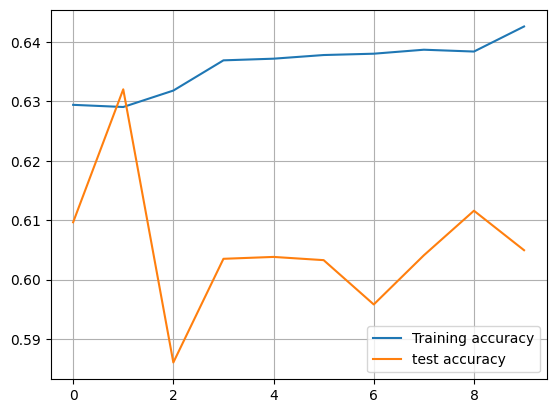

Test Accuracy: 0.6049


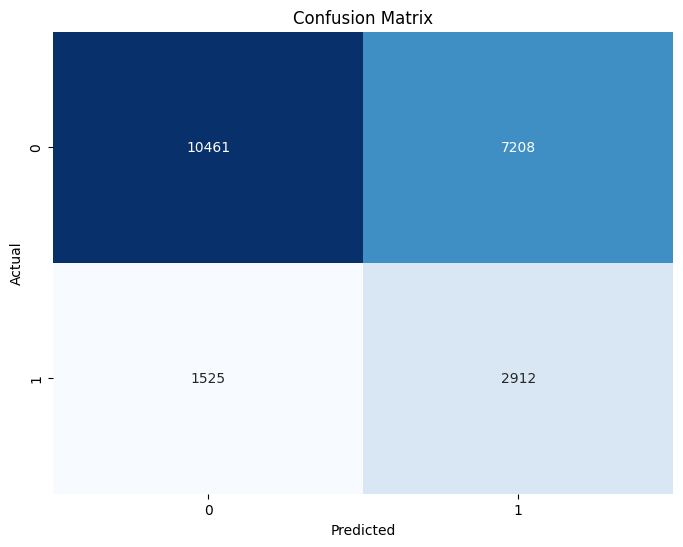

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.59      0.71     17669
           1       0.29      0.66      0.40      4437

    accuracy                           0.60     22106
   macro avg       0.58      0.62      0.55     22106
weighted avg       0.76      0.60      0.64     22106



In [154]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

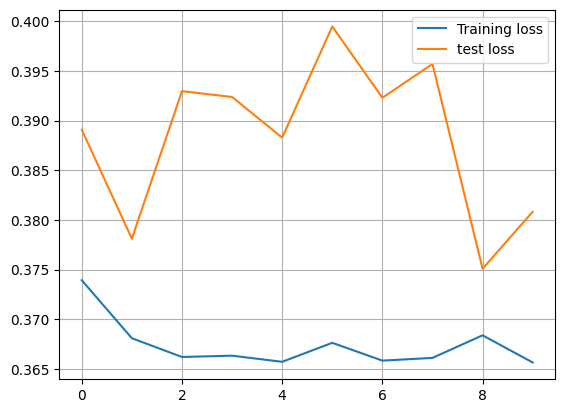

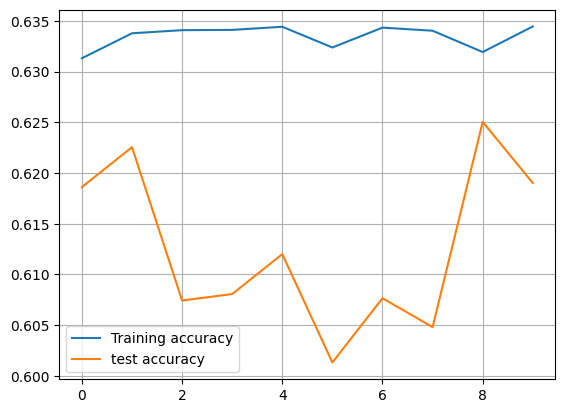

Test Accuracy: 0.6190


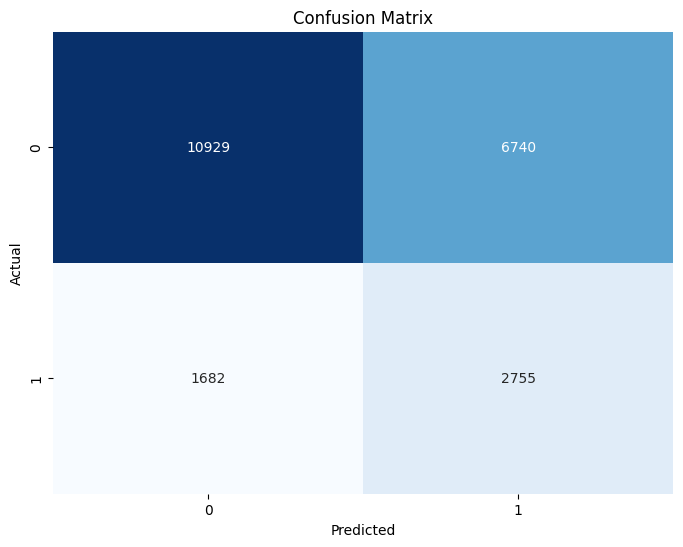

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72     17669
           1       0.29      0.62      0.40      4437

    accuracy                           0.62     22106
   macro avg       0.58      0.62      0.56     22106
weighted avg       0.75      0.62      0.66     22106



In [155]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.001
num_epochs = 10
loss_module = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

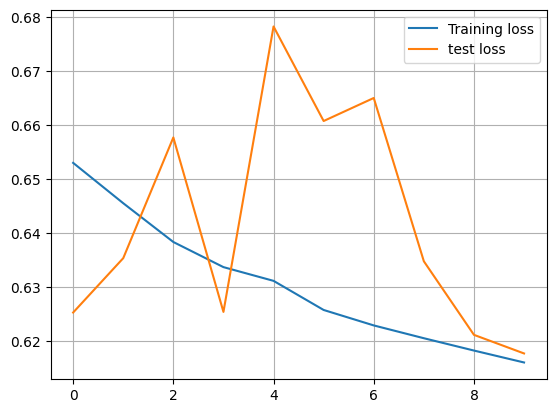

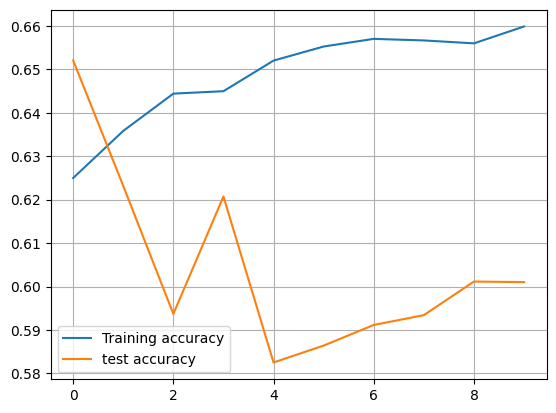

Test Accuracy: 0.6010


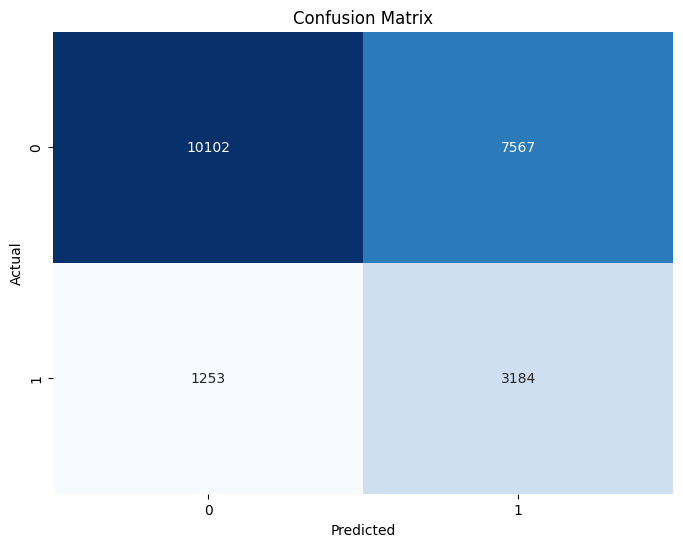

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70     17669
           1       0.30      0.72      0.42      4437

    accuracy                           0.60     22106
   macro avg       0.59      0.64      0.56     22106
weighted avg       0.77      0.60      0.64     22106



In [156]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.001
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

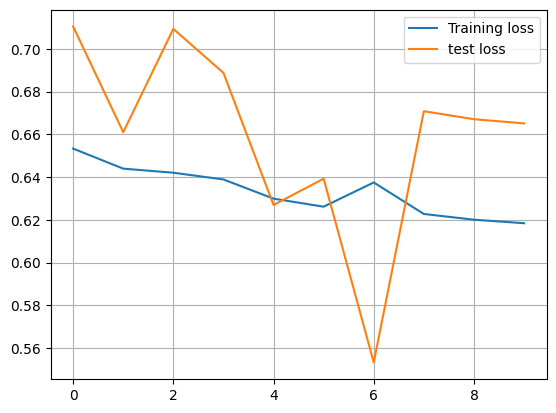

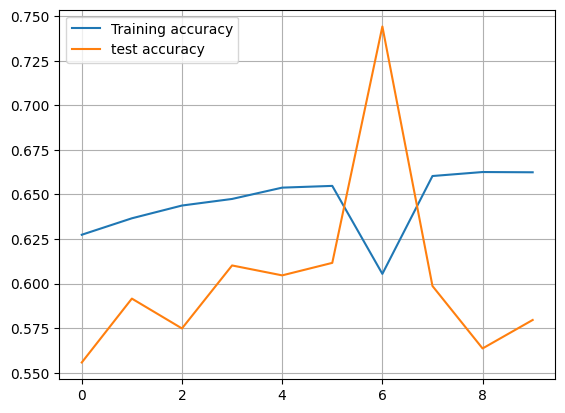

Test Accuracy: 0.5796


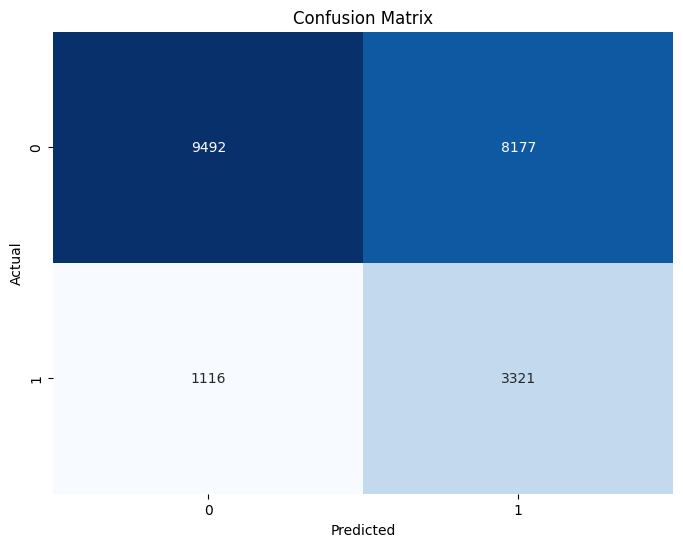

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.54      0.67     17669
           1       0.29      0.75      0.42      4437

    accuracy                           0.58     22106
   macro avg       0.59      0.64      0.54     22106
weighted avg       0.77      0.58      0.62     22106



In [157]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

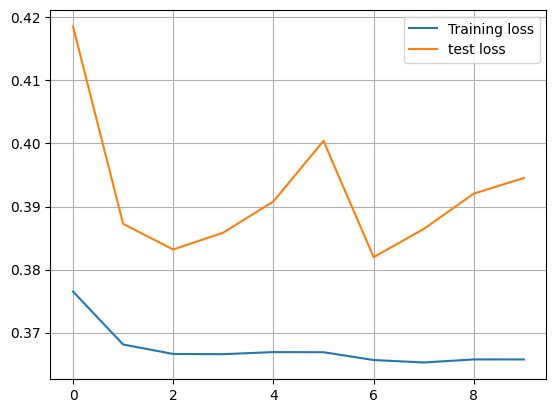

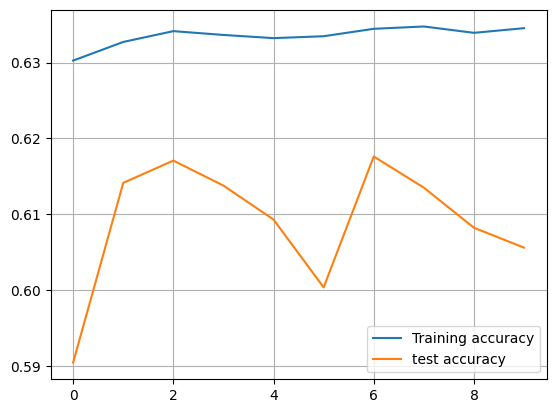

Test Accuracy: 0.6056


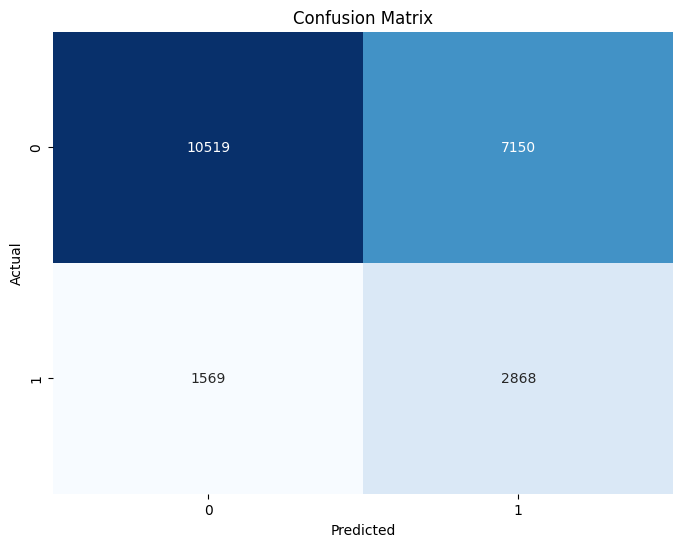

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     17669
           1       0.29      0.65      0.40      4437

    accuracy                           0.61     22106
   macro avg       0.58      0.62      0.55     22106
weighted avg       0.75      0.61      0.64     22106



In [158]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.001
num_epochs = 10
loss_module = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

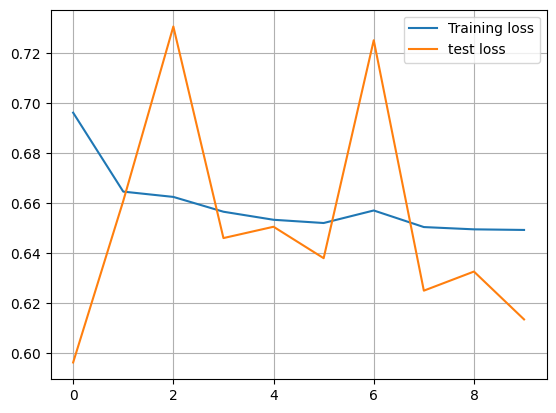

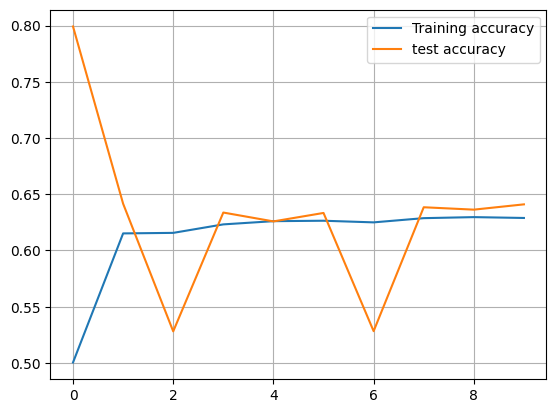

Test Accuracy: 0.6410


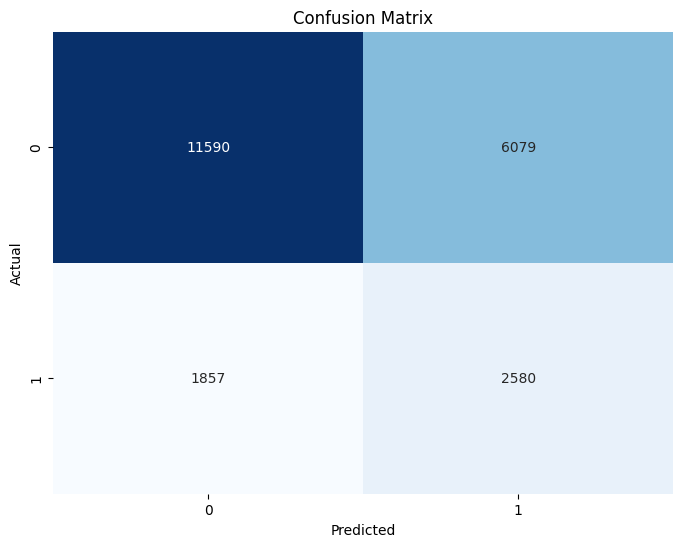

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.74     17669
           1       0.30      0.58      0.39      4437

    accuracy                           0.64     22106
   macro avg       0.58      0.62      0.57     22106
weighted avg       0.75      0.64      0.67     22106



In [159]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.1
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

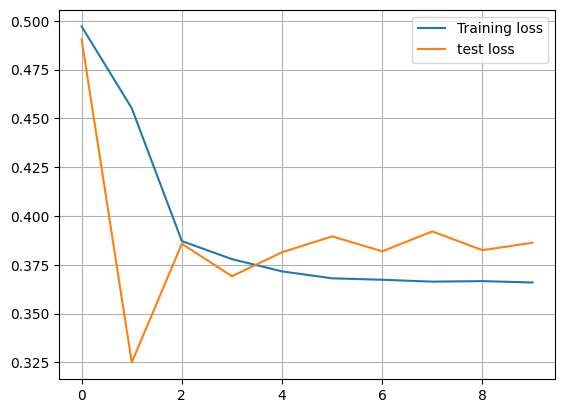

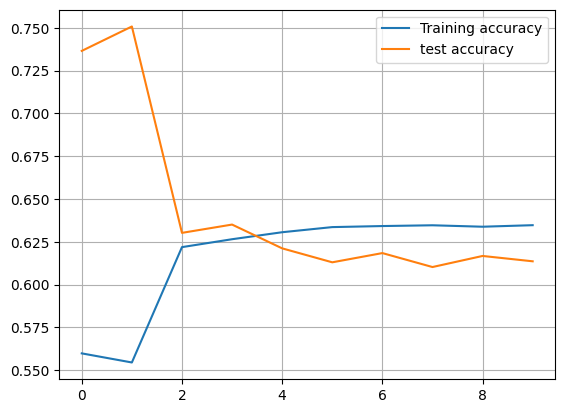

Test Accuracy: 0.6136


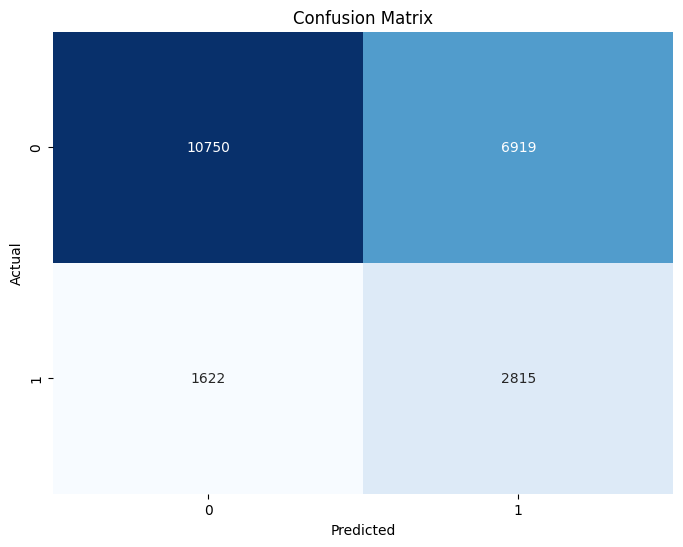

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72     17669
           1       0.29      0.63      0.40      4437

    accuracy                           0.61     22106
   macro avg       0.58      0.62      0.56     22106
weighted avg       0.75      0.61      0.65     22106



In [160]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.1
num_epochs = 10
loss_module = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

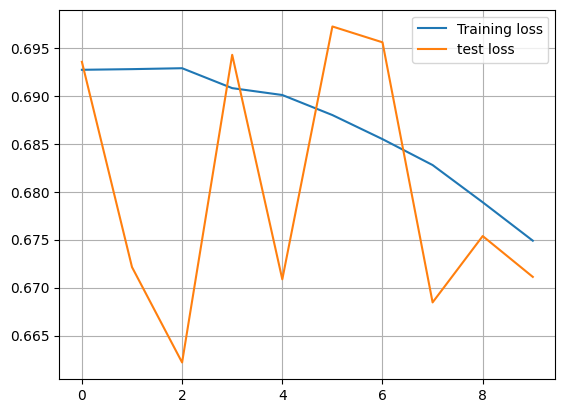

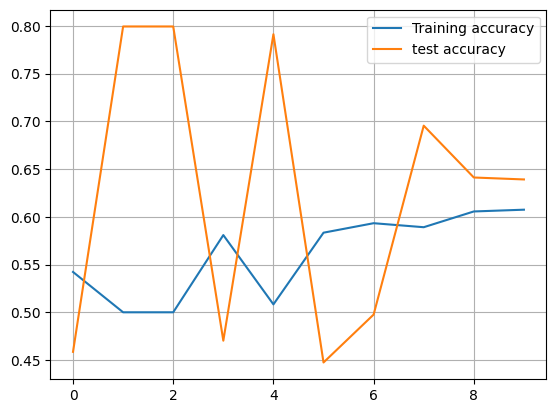

Test Accuracy: 0.6391


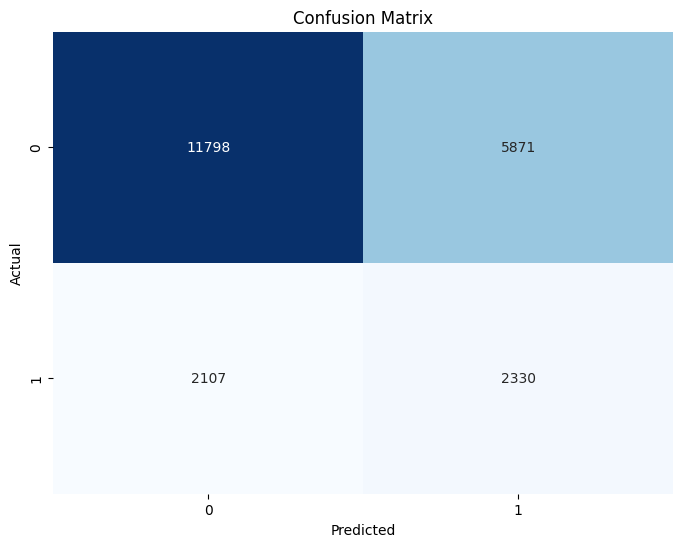

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75     17669
           1       0.28      0.53      0.37      4437

    accuracy                           0.64     22106
   macro avg       0.57      0.60      0.56     22106
weighted avg       0.74      0.64      0.67     22106



In [161]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

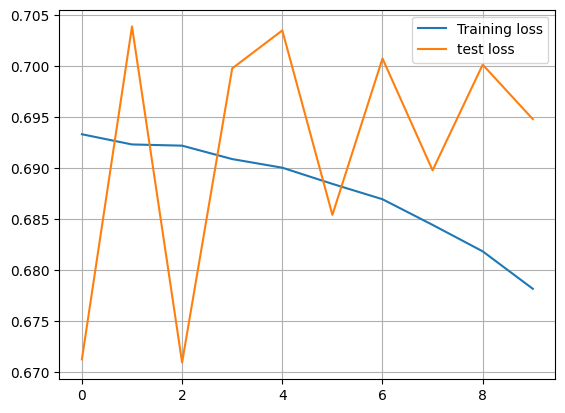

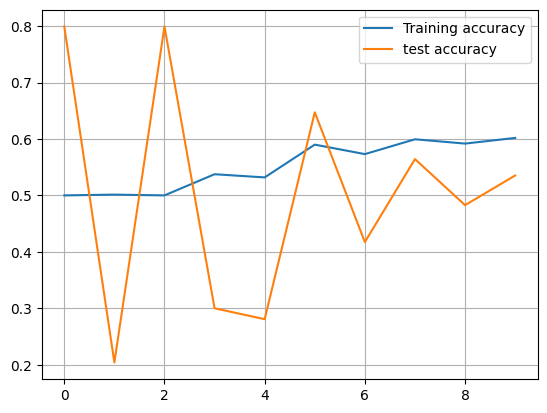

Test Accuracy: 0.5353


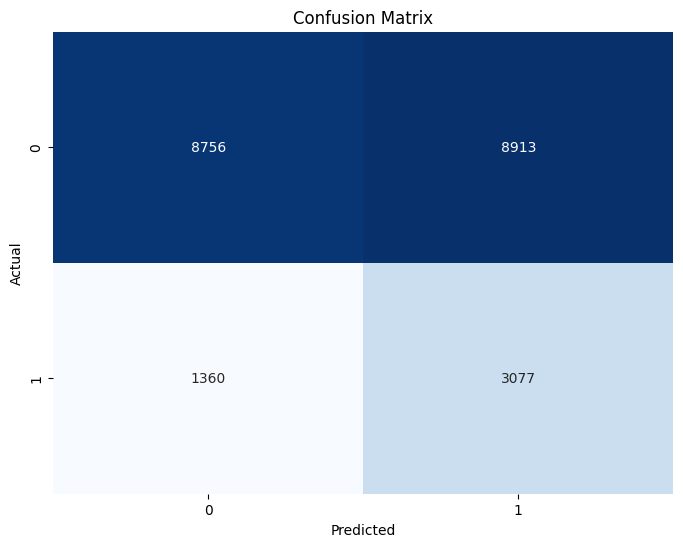

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.50      0.63     17669
           1       0.26      0.69      0.37      4437

    accuracy                           0.54     22106
   macro avg       0.56      0.59      0.50     22106
weighted avg       0.74      0.54      0.58     22106



In [162]:
model = MLP(X_train.shape[1], 128, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

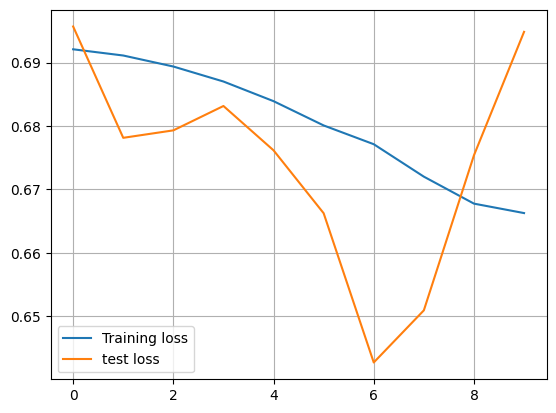

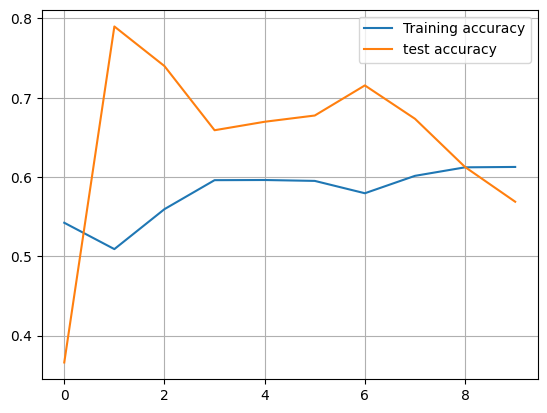

Test Accuracy: 0.5688


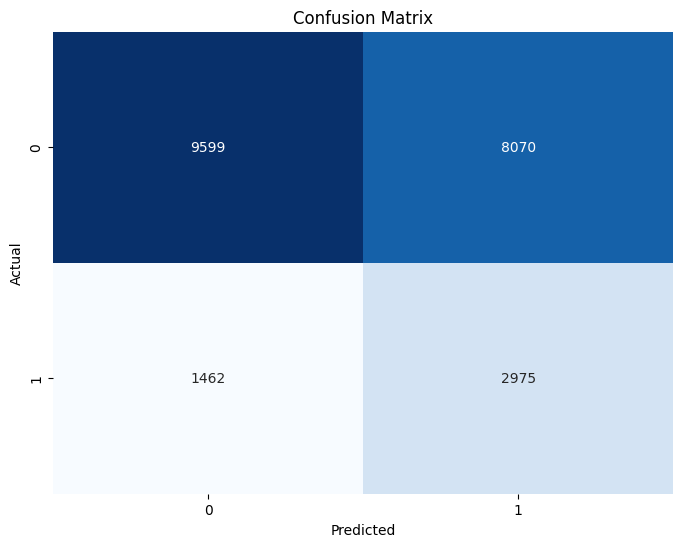

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.54      0.67     17669
           1       0.27      0.67      0.38      4437

    accuracy                           0.57     22106
   macro avg       0.57      0.61      0.53     22106
weighted avg       0.75      0.57      0.61     22106



In [163]:
model = MLP(X_train.shape[1], 512, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

  0%|          | 0/10 [00:00<?, ?it/s]

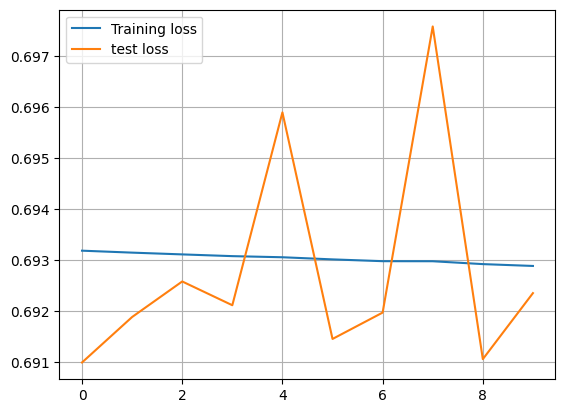

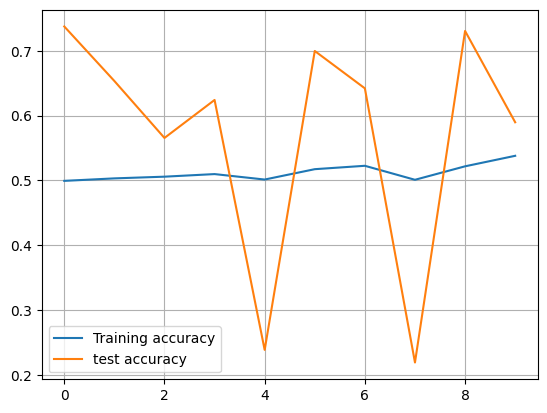

Test Accuracy: 0.5897


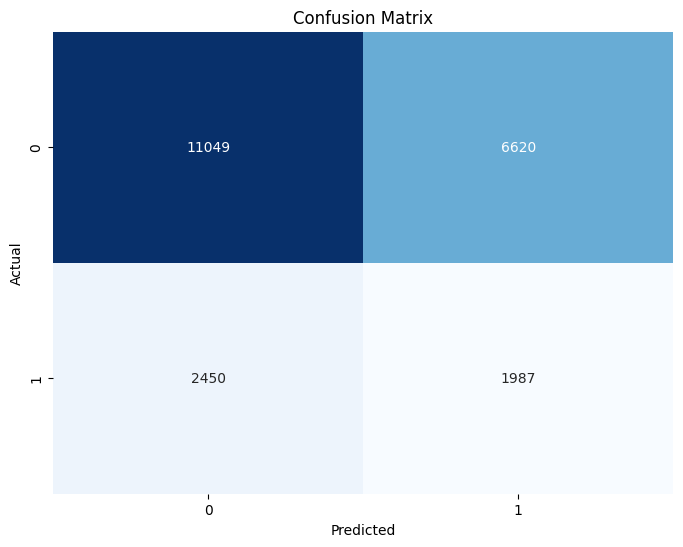

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.63      0.71     17669
           1       0.23      0.45      0.30      4437

    accuracy                           0.59     22106
   macro avg       0.52      0.54      0.51     22106
weighted avg       0.70      0.59      0.63     22106



In [164]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.001
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

In [165]:
import torch.nn.init as init

In [166]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, dropout_prob, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.activation = activation
        self.sigmoid = nn.Sigmoid()
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

  0%|          | 0/10 [00:00<?, ?it/s]

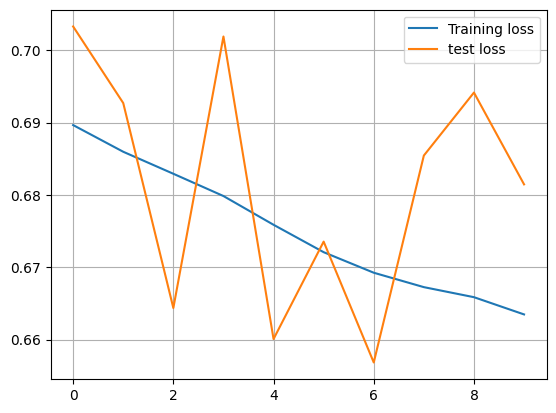

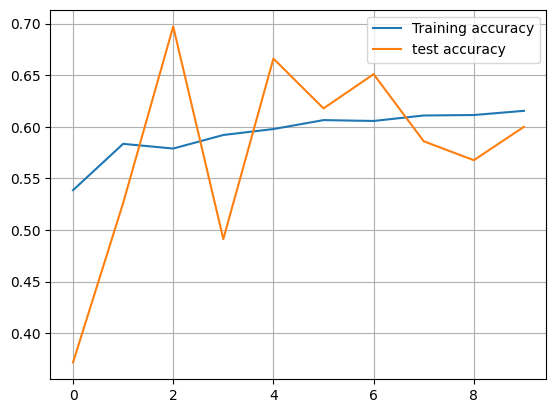

Test Accuracy: 0.6000


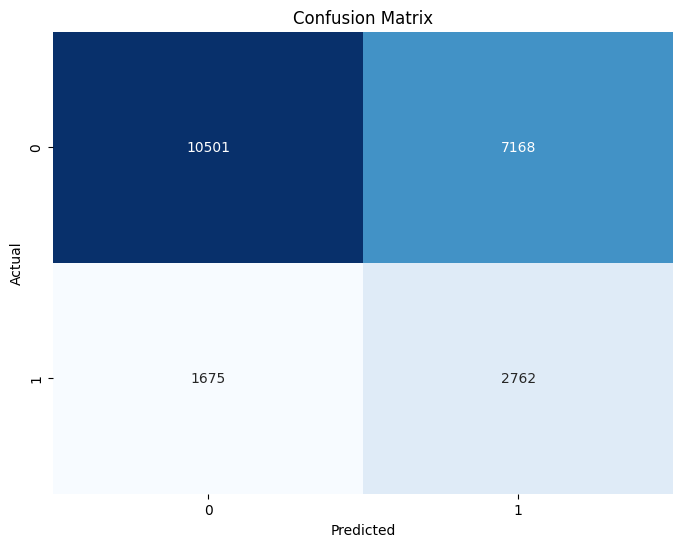

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.59      0.70     17669
           1       0.28      0.62      0.38      4437

    accuracy                           0.60     22106
   macro avg       0.57      0.61      0.54     22106
weighted avg       0.75      0.60      0.64     22106



In [167]:
model = MLP(X_train.shape[1], 256, 16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

In [168]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, dropout_prob, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.activation = activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

  0%|          | 0/10 [00:00<?, ?it/s]

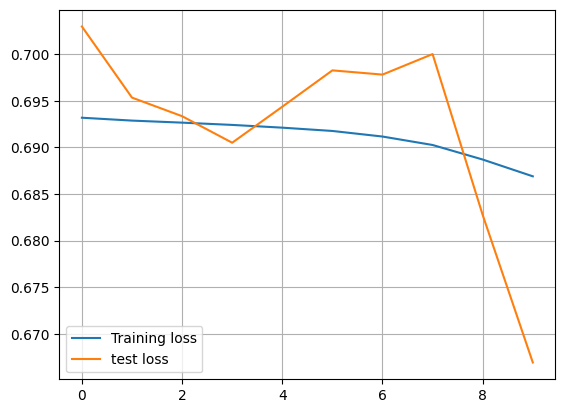

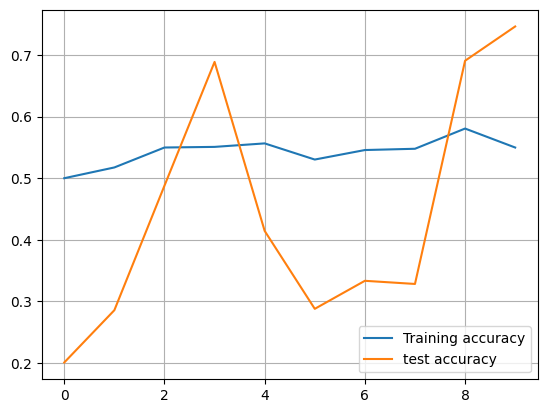

Test Accuracy: 0.7464


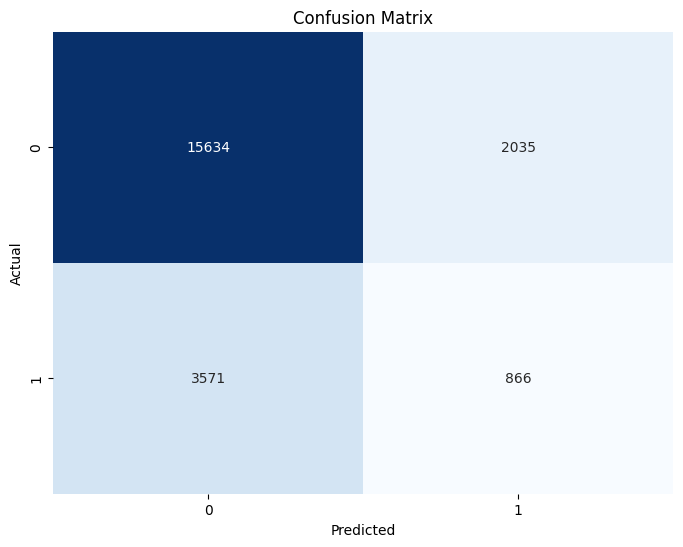

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     17669
           1       0.30      0.20      0.24      4437

    accuracy                           0.75     22106
   macro avg       0.56      0.54      0.54     22106
weighted avg       0.71      0.75      0.73     22106



In [169]:
model = MLP(X_train.shape[1], 128,16,8,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 10
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

In [170]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, dropout_prob, activation):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, output_size)
        self.activation = activation
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        return out

  0%|          | 0/5 [00:00<?, ?it/s]

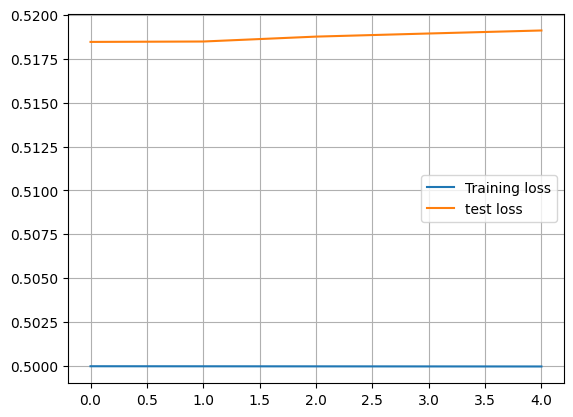

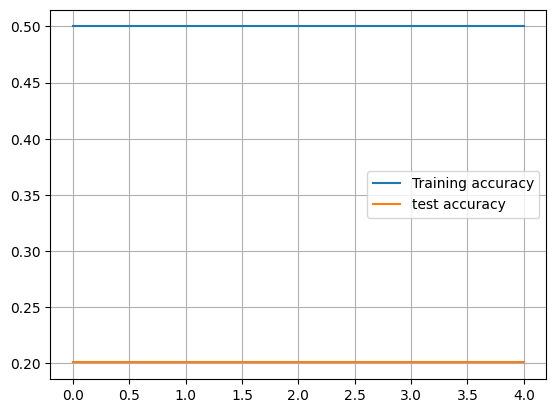

Test Accuracy: 0.2007


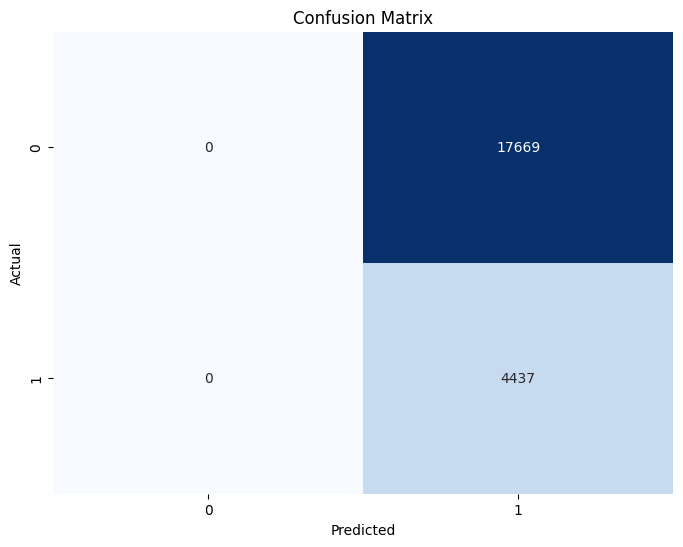

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.20      1.00      0.33      4437

    accuracy                           0.20     22106
   macro avg       0.10      0.50      0.17     22106
weighted avg       0.04      0.20      0.07     22106

Test Accuracy: 0.2007


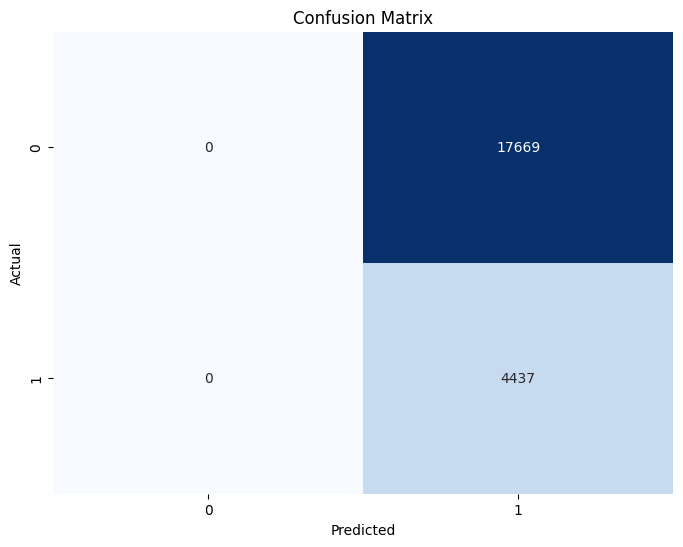

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.20      1.00      0.33      4437

    accuracy                           0.20     22106
   macro avg       0.10      0.50      0.17     22106
weighted avg       0.04      0.20      0.07     22106

Test Accuracy: 0.2007


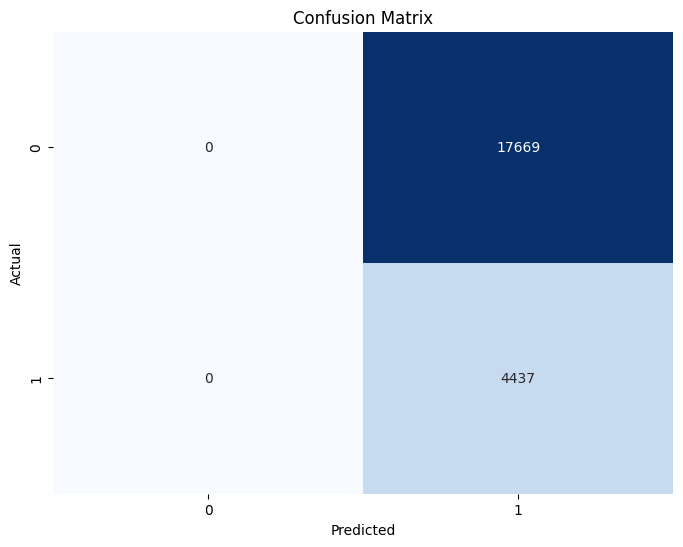

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     17669
           1       0.20      1.00      0.33      4437

    accuracy                           0.20     22106
   macro avg       0.10      0.50      0.17     22106
weighted avg       0.04      0.20      0.07     22106

Test Accuracy: 0.7993


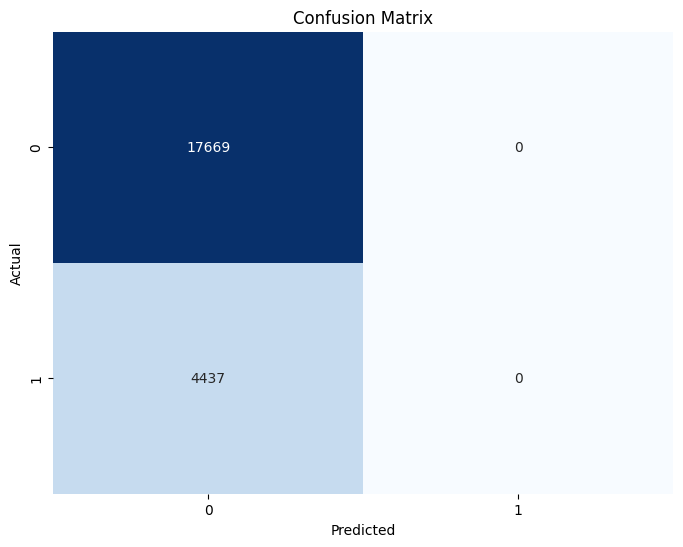

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106

Test Accuracy: 0.7993


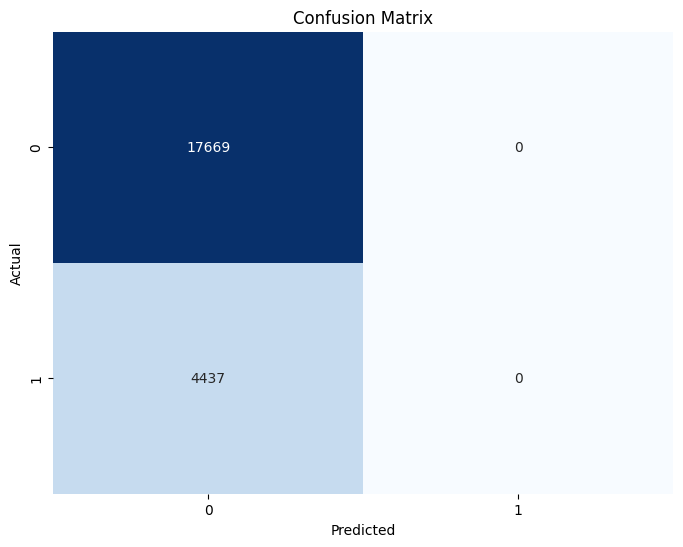

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



In [171]:
model = MLP(X_train.shape[1], 64,32,16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.001
num_epochs = 5
loss_module = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
arr = [0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(train_losses, label="Training loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.grid(True)
plt.show()
plt.plot(train_accuracy, label="Training accuracy")
plt.plot(test_accuracy, label="test accuracy")
plt.legend()
plt.grid(True)
plt.show()
for dis in arr:
    with torch.no_grad():
        model.eval()
        test_outputs = model(X_test_tensor)
        test_predicted = (test_outputs >= dis).float()
        test_accuracy = (test_predicted == y_test_tensor.view(-1, 1)).float().mean()
        tqdm.write(f'Test Accuracy: {test_accuracy.item():.4f}')
        cm = confusion_matrix(y_test, test_predicted.cpu())
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
        tqdm.write("Classification Report:")
        tqdm.write(classification_report(y_test, test_predicted.cpu()))

  0%|          | 0/5 [00:00<?, ?it/s]

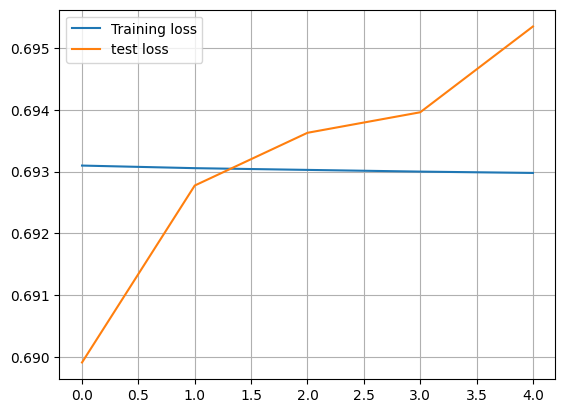

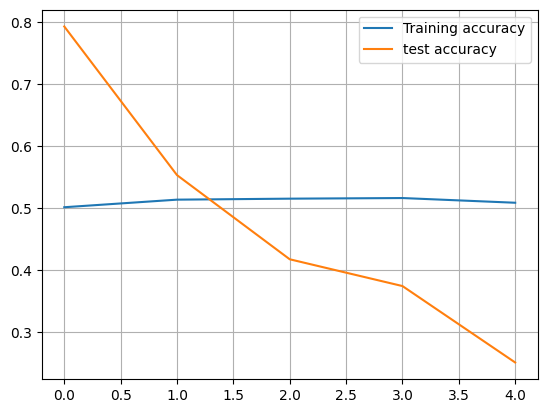

Test Accuracy: 0.2515


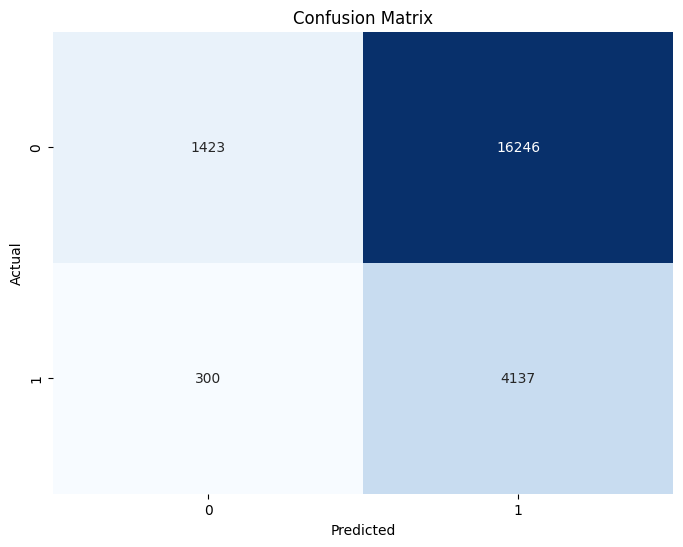

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.08      0.15     17669
           1       0.20      0.93      0.33      4437

    accuracy                           0.25     22106
   macro avg       0.51      0.51      0.24     22106
weighted avg       0.70      0.25      0.18     22106



  0%|          | 0/5 [00:00<?, ?it/s]

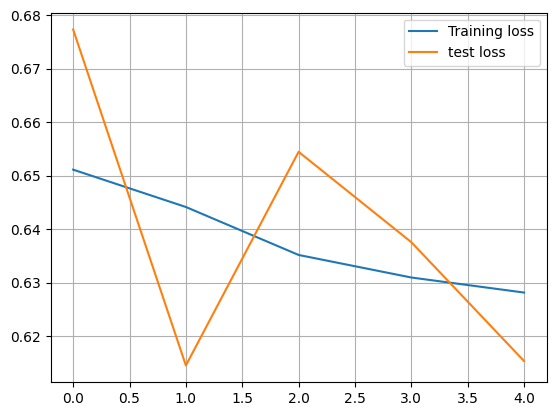

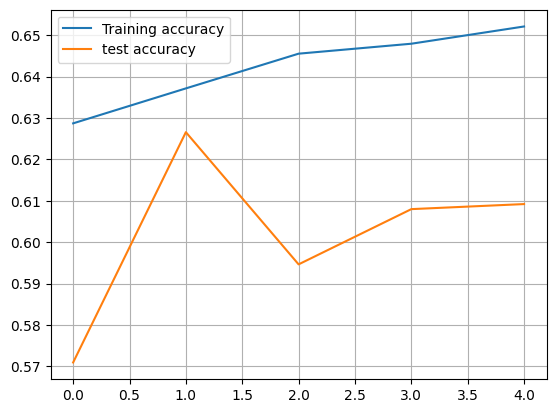

Test Accuracy: 0.6092


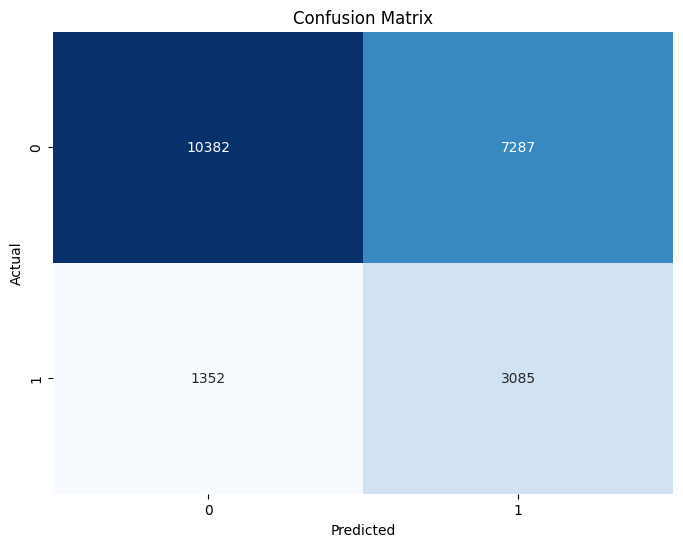

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.59      0.71     17669
           1       0.30      0.70      0.42      4437

    accuracy                           0.61     22106
   macro avg       0.59      0.64      0.56     22106
weighted avg       0.77      0.61      0.65     22106



  0%|          | 0/5 [00:00<?, ?it/s]

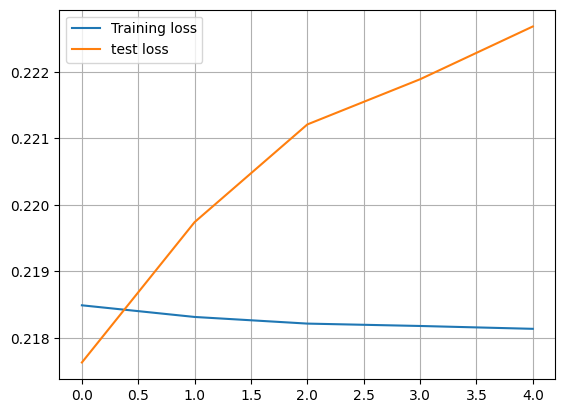

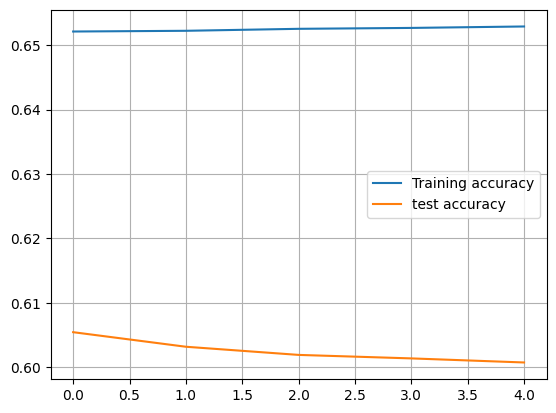

Test Accuracy: 0.6007


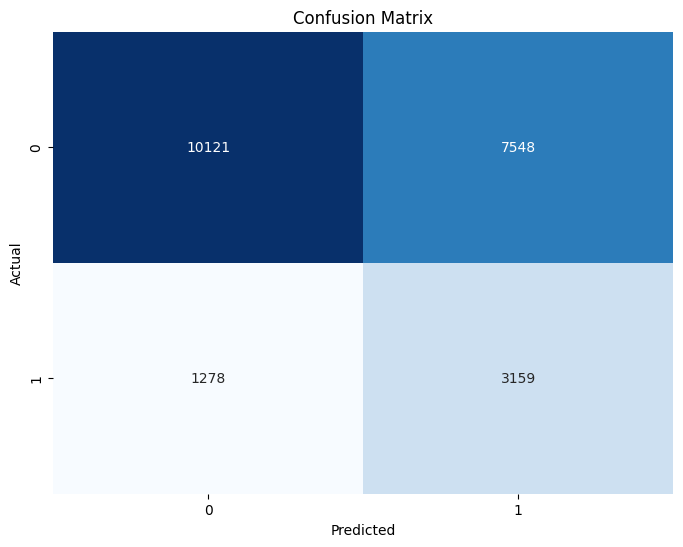

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70     17669
           1       0.30      0.71      0.42      4437

    accuracy                           0.60     22106
   macro avg       0.59      0.64      0.56     22106
weighted avg       0.77      0.60      0.64     22106



  0%|          | 0/5 [00:00<?, ?it/s]

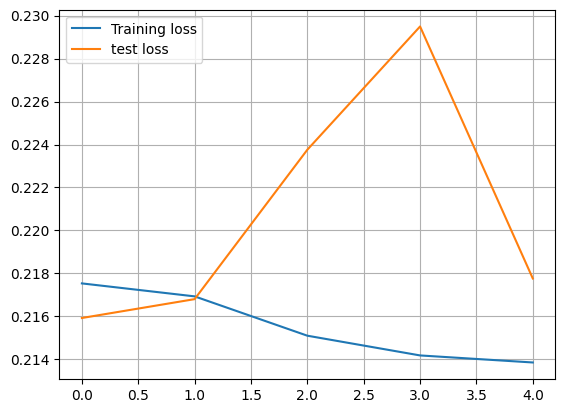

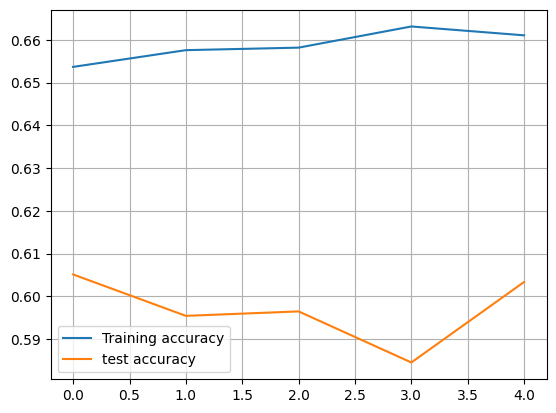

Test Accuracy: 0.6034


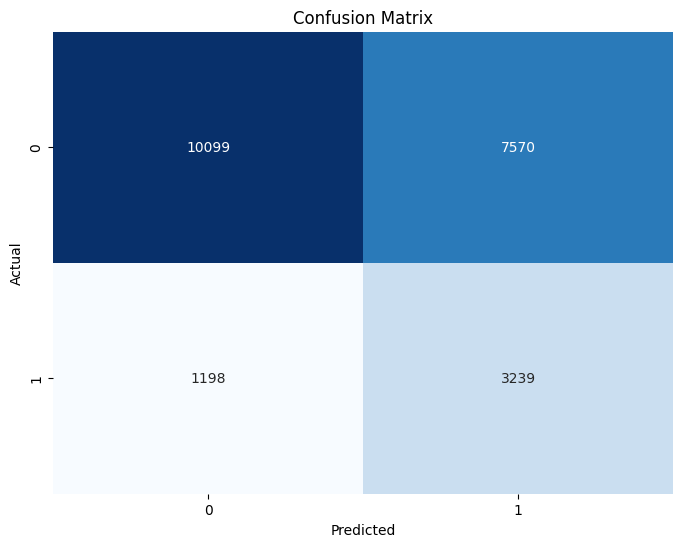

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70     17669
           1       0.30      0.73      0.42      4437

    accuracy                           0.60     22106
   macro avg       0.60      0.65      0.56     22106
weighted avg       0.77      0.60      0.64     22106



  0%|          | 0/5 [00:00<?, ?it/s]

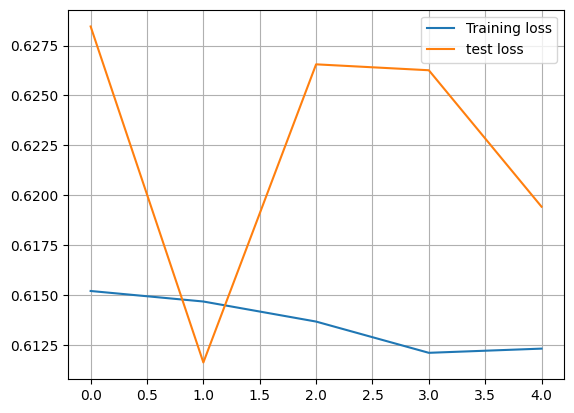

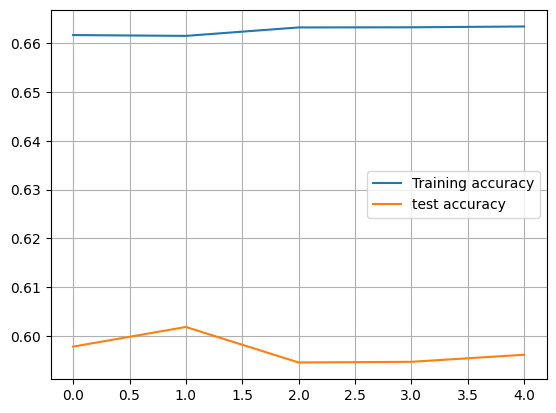

Test Accuracy: 0.5961


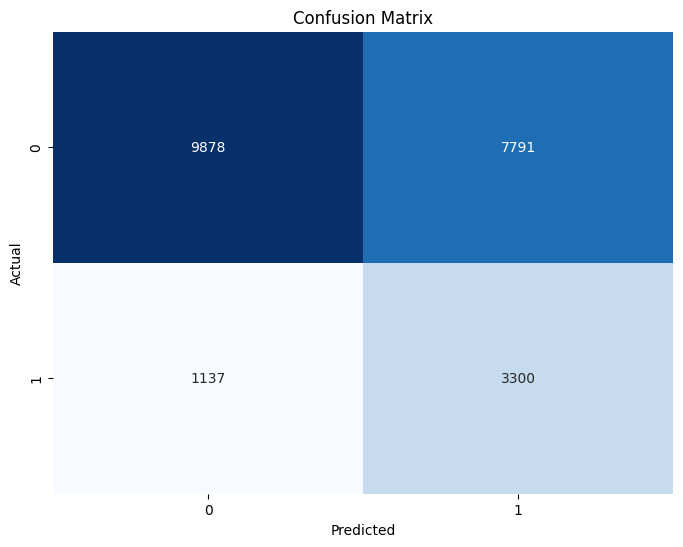

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.56      0.69     17669
           1       0.30      0.74      0.43      4437

    accuracy                           0.60     22106
   macro avg       0.60      0.65      0.56     22106
weighted avg       0.78      0.60      0.64     22106



  0%|          | 0/5 [00:00<?, ?it/s]

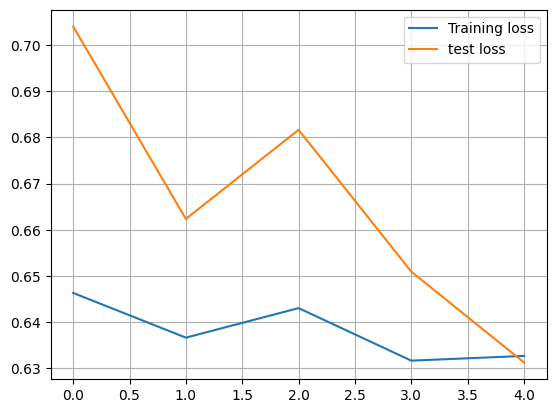

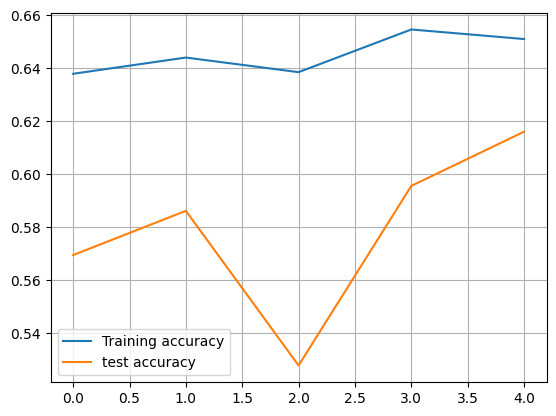

Test Accuracy: 0.6160


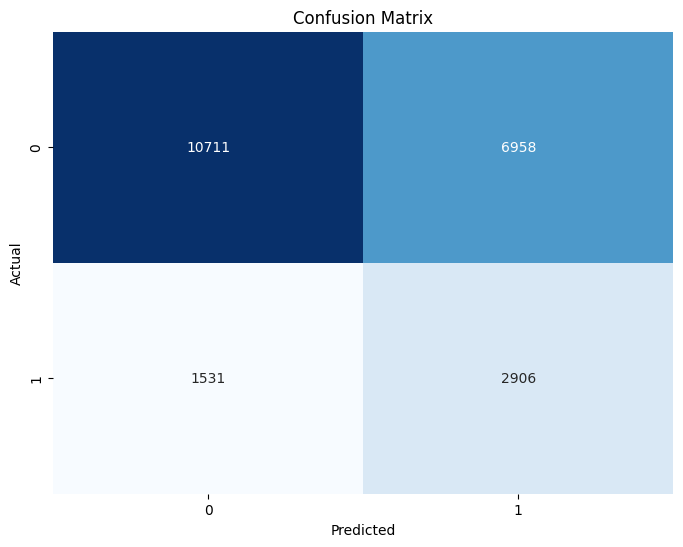

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.61      0.72     17669
           1       0.29      0.65      0.41      4437

    accuracy                           0.62     22106
   macro avg       0.58      0.63      0.56     22106
weighted avg       0.76      0.62      0.65     22106



  0%|          | 0/5 [00:00<?, ?it/s]

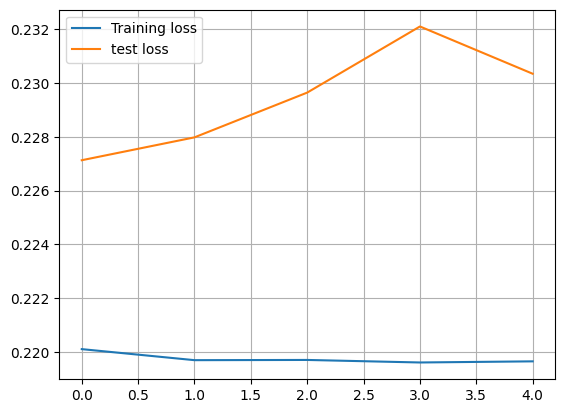

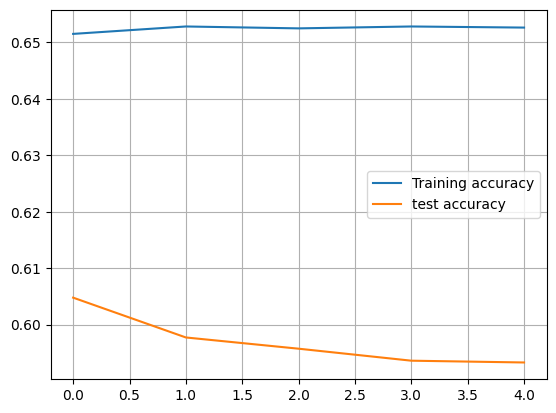

Test Accuracy: 0.5933


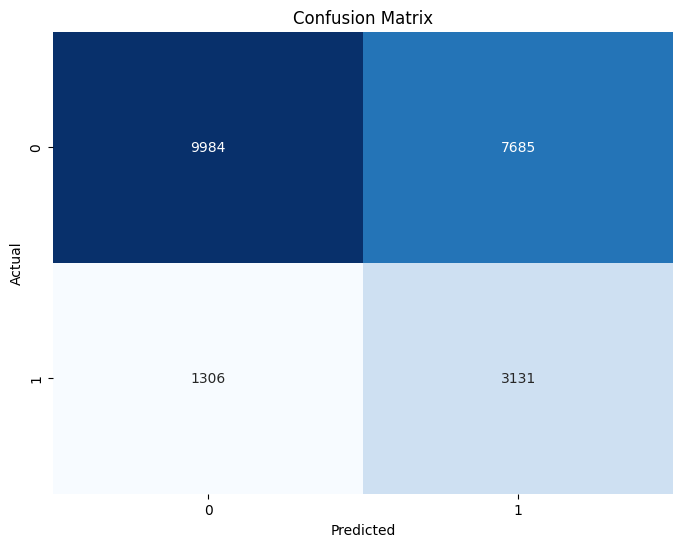

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.57      0.69     17669
           1       0.29      0.71      0.41      4437

    accuracy                           0.59     22106
   macro avg       0.59      0.64      0.55     22106
weighted avg       0.76      0.59      0.63     22106



  0%|          | 0/5 [00:00<?, ?it/s]

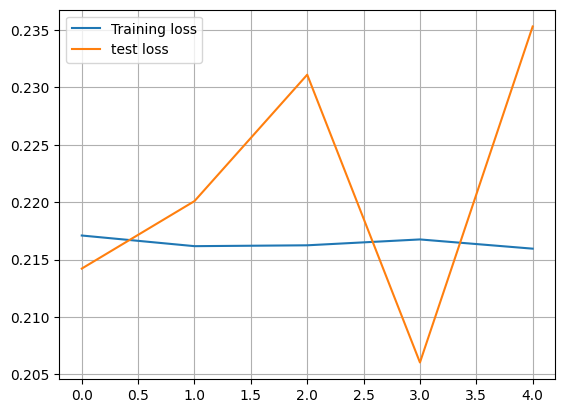

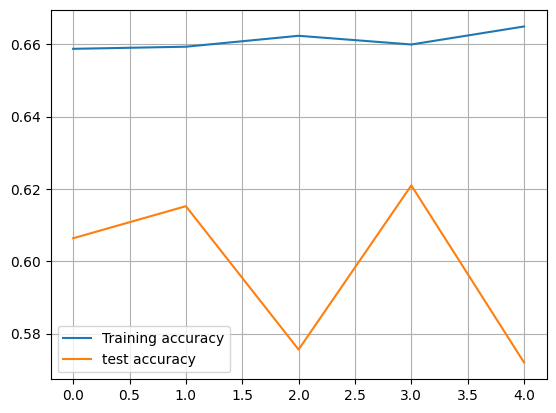

Test Accuracy: 0.5720


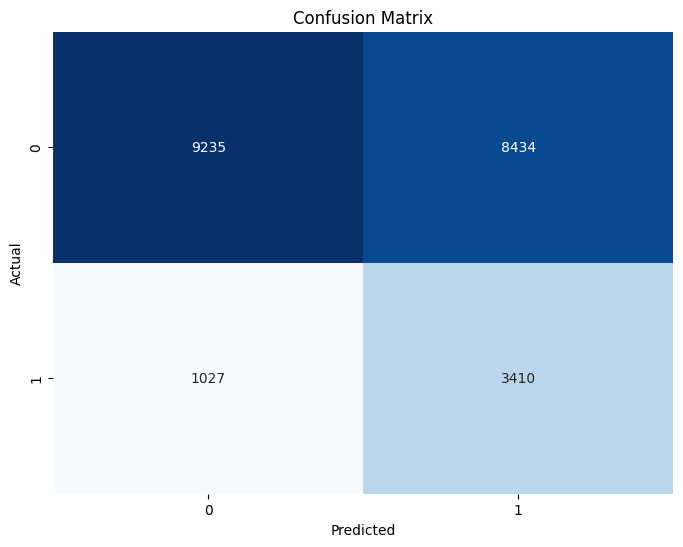

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66     17669
           1       0.29      0.77      0.42      4437

    accuracy                           0.57     22106
   macro avg       0.59      0.65      0.54     22106
weighted avg       0.78      0.57      0.61     22106



In [172]:
model = MLP(X_train.shape[1], 512,32,16,1, 0.5, nn.Sigmoid()).to(device)
lrs = [0.001, 0.01]
num_epochs = 5
loss_modules = [nn.BCELoss(), nn.MSELoss()]
for lr in lrs:
    for loss_module in loss_modules:
        optimizers = [torch.optim.SGD(model.parameters(), lr=lr), torch.optim.Adam(model.parameters(), lr=lr)]
        for optimizer in optimizers:
            model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)
            plot(train_losses, test_losses, train_accuracy, test_accuracy, model)

In [173]:
def plot(train_losses, test_losses, train_accuracy, test_accuracy, model, X_test_tensor, y_test):
    plt.plot(train_losses, label="Training loss")
    plt.plot(test_losses, label="test loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.plot(train_accuracy, label="Training accuracy")
    plt.plot(test_accuracy, label="test accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

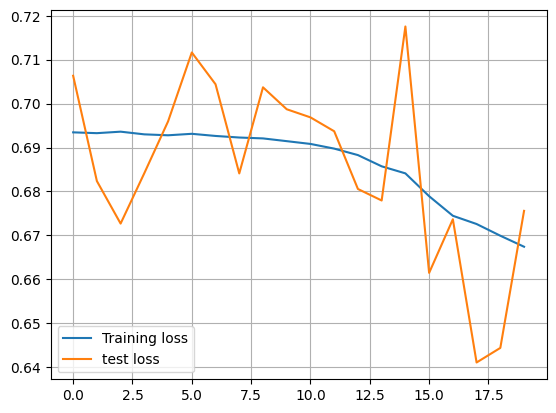

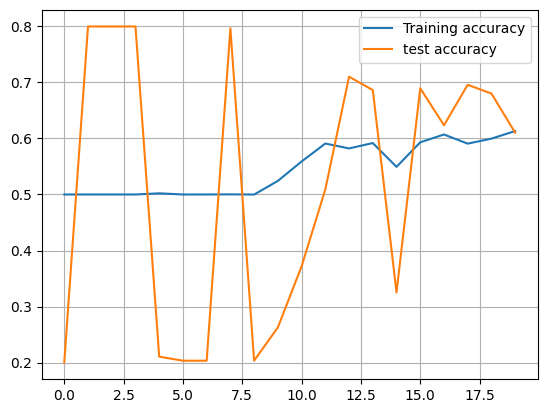

In [174]:
from sklearn.model_selection import KFold
X = data.drop(['No-show_Yes'], axis=1)
y = data['No-show_Yes']
cross = KFold(n_splits=4, random_state=42, shuffle=True)
cross.get_n_splits(X)

model = MLP(X_train.shape[1], 256,32,16,1, 0.5, nn.Sigmoid()).to(device)
lr = 0.01
num_epochs = 5
loss_module = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

train_los = []
test_los = []
train_ac = []
test_ac = []
X_test_tensor_k = torch.tensor([]).to(device)
y_test_tensor_k = torch.tensor([]).to(device)
input_size = X_train.shape[1]
test_outputs = torch.tensor([]).to(device)
y_tes = None
f = 1
for train_index,test_index in cross.split(X):

    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_transformed = scaler.transform(X_train)
    X_test_transformed = scaler.transform(X_test)


    undersampler = RandomUnderSampler(random_state=42)

    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_transformed, y_train)
    X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train_resampled.to_numpy(), dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(device)
    train_dataloader = DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size=16, shuffle=True)
    test_dataloader = DataLoader(TensorDataset(X_test_tensor,y_test_tensor), batch_size=16, shuffle=False)
    if f > 0:
        y_tes = y_test
        f -= 1
        model, train_los, train_ac, test_los, test_ac = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)


        with torch.no_grad():
            model.eval()
            test_outputs =  torch.cat((test_outputs, model(X_test_tensor)), dim=0)
        flag=False
    else:     
        y_tes = pd.concat([y_tes, y_test])
        model, train_losses, train_accuracy, test_losses, test_accuracy = training(model, loss_module, optimizer, train_dataloader, test_dataloader, num_epochs, device)

        train_los += train_losses
        test_los += test_losses
        train_ac += train_accuracy
        test_ac += test_accuracy
        with torch.no_grad():
            model.eval()
            test_outputs =  torch.cat((test_outputs, model(X_test_tensor)), dim=0)
test_predicted = (test_outputs >= 0.5).float()


train_los = np.array(train_los)
test_los = np.array(test_los)
train_ac = np.array(train_ac)
test_ac = np.array(test_ac)
plot(train_los, test_los, train_ac, test_ac, model, X_test_tensor_k, y_tes)
